## Предсказание ухода клиента в телекоммуникационной компании

#### Описание:

Вы работаете с набором данных о клиентах телекоммуникационной компании. Ваша задача — построить модель машинного обучения для предсказания, уйдет ли клиент компании, основываясь на предоставленных характеристиках. Датасет включает в себя информацию о потребительских привычках, финансовых транзакциях, демографических данных и других факторах, которые могут повлиять на решение клиента о продолжении или завершении использования услуг компании.

#### Этапы выполнения:

1. Загрузка и предварительная обработка данных:
+ Загрузите данные из CSV файла.
+ Проанализируйте наличие пропущенных значений и выполните их обработку (например, удаление или заполнение средними/медийными значениями).
+ Проанализируйте категориальные переменные и, при необходимости, выполните кодирование (например, с помощью one-hot encoding или label encoding).

2. Исследование и анализ признаков:
+ Проведите статистический анализ каждого признака (среднее, стандартное отклонение, корреляции и т.д.).
+ Визуализируйте распределение признаков (гистограммы, боксплоты).
+ Проанализируйте важность признаков с помощью методов Feature Selection (например, корреляция, методы отбора на основе важности признаков).

3. Построение модели классификации:
+ Разделите данные на тренировочную и тестовую выборки.
+ Постройте несколько моделей классификации (например, логистическая регрессия, случайный лес, градиентный бустинг, метод опорных векторов, или стекинг).
+ Проведите кросс-валидацию и оцените качество моделей с использованием метрик: accuracy, precision, recall, F1-score и ROC-AUC.
+ Определите наилучшую модель на основе этих метрик.

4. Тонкая настройка модели:
+ Используйте методы гиперпараметрической оптимизации, такие как Grid Search, Randomized Search или Optuna, для улучшения качества модели.
+ Примените методы балансировки классов, если это необходимо (например, с помощью SMOTE или взвешивания классов).

5. Интерпретация результатов:
+ Представьте модель в виде интерпретируемого решения (например, важность признаков).
+ Объясните, какие признаки наиболее важны для предсказания ухода клиента.

6. Отчетность:
+ По каждому из пунктов ожидаю комментарии, почему сделали именно это и что из этого следует. Блокнот должен состоять из пяти блоков соответственно нумерации заданий.


### Описание признаков
Признаки в датасете telecom_churn могут быть разделены на несколько категорий в зависимости от типа информации, которую они представляют. Вот краткое описание некоторых признаков:

1. Средние значения по различным услугам и операциям

Эти признаки относятся к использованию различных сервисов и потребительским привычкам:

rev_Mean, mou_Mean, totmrc_Mean, da_Mean: Средние значения по доходам, продолжительности разговоров, общим расходам и использованию данных.
ovrmou_Mean, ovrrev_Mean: Среднее превышение по минутам и доходам, что может указывать на клиентов, которые часто выходят за пределы своих тарифов.
vceovr_Mean, datovr_Mean, roam_Mean: Средние значения по голосовым перегрузкам, переплатам за использование данных и роуминговым звонкам.

2. Изменения в использовании

change_mou, change_rev: Изменения в количестве минут и доходах, что может показать тенденции к увеличению или уменьшению использования услуг.
drop_vce_Mean, drop_dat_Mean: Средние значения по потерям голосовых или данных, что может указывать на неудовлетворенность клиентом услугами.

3. Классификация звонков и сообщений

blck_vce_Mean, blck_dat_Mean: Среднее количество заблокированных голосовых вызовов и данных.
unan_vce_Mean, unan_dat_Mean: Среднее количество неоплаченных голосовых вызовов и данных.
recv_vce_Mean, recv_sms_Mean: Среднее количество полученных голосовых сообщений и SMS.

4. Активность и использование услуг

custcare_Mean: Среднее количество обращений в службу поддержки.
ccrndmou_Mean, cc_mou_Mean: Средние значения по звонкам с мобильных номеров.
inonemin_Mean: Среднее количество вызовов, длительность которых составляет более 1 минуты.

5. Демографическая информация

new_cell, crclscod, asl_flag: Признаки, связанные с типом устройства, классификацией региона и флагом нового клиента.
prizm_social_one, area, dualband: Признаки, отражающие социальный статус, географическое положение и наличие двухдиапазонного устройства.
income, numbcars, ethnic: Признаки, касающиеся дохода клиента, количества автомобилей и этнической принадлежности.

6. Психографические и поведенческие характеристики

marital, adults, kid0_2, kid3_5: Семейное положение клиента, количество взрослых и детей в семье.
HHstatin, dwllsize: Признаки, относящиеся к статусу домашнего хозяйства и размеру жилья.

7. Финансовые параметры

totcalls, totmou, totrev: Общие значения по числу звонков, использованию минут и общим доходам.
hnd_price, phones, models: Признаки, связанные с ценой устройства, количеством телефонов и моделей.

8. Целевая переменная

churn: Это целевой признак, который обозначает, ушел ли клиент (1) или остался (0) в компании.

9. Идентификаторы и дополнительные атрибуты

Customer_ID: Уникальный идентификатор клиента.
eqpdays: Количество дней, прошедших с момента последней активности.

### 1. Загрузка и предварительная обработка датасета

##### 1.1. Загрузка датасета:

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('dataset/telcom_customer_churn.csv')

Словарь с описанием признаков:

In [6]:
dict_feature_description = {
    'rev_Mean': 'Среднее значение по доходам',
    'mou_Mean': 'Среднее значение по продолжительности разговоров',
    'totmrc_Mean': 'Общие расходы',
    'da_Mean': 'Использование данных',
    'ovrmou_Mean': 'Среднее превышение по минутам',
    'ovrrev_Mean': 'Среднее превышение по доходам',
    'vceovr_Mean': 'Среднее значение по голосовым перегрузкам',
    'datovr_Mean': 'Среднее значение по переплатам за использование данных',
    'roam_Mean': 'Среднее значение по переплатам по роуминговым звонкам',
    'change_mou': 'Изменение в количестве минут',
    'change_rev': 'Изменение в доходах',
    'drop_vce_Mean': 'Среднее значение по потерям голосовых',
    'drop_dat_Mean': 'Среднее значение по потерям данных',
    'blck_vce_Mean': 'Среднее количество заблокированных голосовых вызовов',
    'blck_dat_Mean': 'Среднее количество заблокированных данных',
    'unan_vce_Mean': 'Среднее количество неоплаченных голосовых вызовов',
    'unan_dat_Mean': 'Среднее количество неоплаченных данных',
    'plcd_vce_Mean': '',
    'plcd_dat_Mean': '',
    'recv_vce_Mean': 'Среднее количество полученных голосовых сообщений',
    'recv_sms_Mean': 'Среднее количество полученных SMS',
    'comp_vce_Mean': '',
    'comp_dat_Mean': '',
    'custcare_Mean': 'Среднее количество обращений в службу поддержки',
    'ccrndmou_Mean': '?Среднее значение по звонкам с мобильных номеров',
    'cc_mou_Mean': '?Среднее значение по звонкам с мобильных номеров',
    'inonemin_Mean': 'Среднее количество вызовов, длительность которых составляет более 1 минуты',
    'threeway_Mean': '',
    'mou_cvce_Mean': '',
    'mou_cdat_Mean': '',
    'mou_rvce_Mean': '',
    'owylis_vce_Mean': '',
    'mouowylisv_Mean': '',
    'iwylis_vce_Mean': '',
    'mouiwylisv_Mean': '',
    'peak_vce_Mean': '',
    'peak_dat_Mean': '',
    'mou_peav_Mean': '',
    'mou_pead_Mean': '',
    'opk_vce_Mean': '',
    'opk_dat_Mean': '',
    'mou_opkv_Mean': '',
    'mou_opkd_Mean': '',
    'drop_blk_Mean': '',
    'attempt_Mean': '',
    'complete_Mean': '',
    'callfwdv_Mean': '',
    'callwait_Mean': '',
    'churn': '1 - клиент ушел, 0 - остался',
    'months': '',
    'uniqsubs': '',
    'actvsubs': '',
    'new_cell': 'Признак, связанный с типом устройства',
    'crclscod': 'Классификация региона',
    'asl_flag': 'Флаг нового клиента',
    'totcalls': 'Общие значения по числу звонков',
    'totmou': 'Общие значения по использованию минут',
    'totrev': 'Общие значения по общим доходам',
    'adjrev': '',
    'adjmou': '',
    'adjqty': '',
    'avgrev': '',
    'avgmou': '',
    'avgqty': '',
    'avg3mou': '',
    'avg3qty': '',
    'avg3rev': '',
    'avg6mou': '',
    'avg6qty': '',
    'avg6rev': '',
    'prizm_social_one': 'Признак, отражающий социальный статус',
    'area': 'Признак, отражающий географическое положение',
    'dualband': 'Признак, отражающий наличие двухдиапазонного устройства',
    'refurb_new': '',
    'hnd_price': 'Признак, связанный с ценой устройства',
    'phones': 'Признак, связанный с количеством телефонов',
    'models': 'Признак, связанный с количеством моделей',
    'hnd_webcap': '',
    'truck': '',
    'rv': '',
    'ownrent': '',
    'lor': '',
    'dwlltype': '',
    'marital': 'Семейное положение клиента',
    'adults': 'Количество взрослых',
    'infobase': '',
    'income': 'Признак, касающийся дохода клиента',
    'numbcars': 'Признак, касающийся количества автомобилей',
    'HHstatin': 'Признак, относящийся к статусу домашнего хозяйства',
    'dwllsize': 'Признак, относящийся к размеру жилья',
    'forgntvl': '',
    'ethnic': 'Признак, касающийся этнической принадлежности',
    'kid0_2': 'Дети 0 - 2',
    'kid3_5': 'Дети 3 - 5',
    'kid6_10': 'Дети 6 - 10',
    'kid11_15': 'Дети 11 - 15',
    'kid16_17': 'Дети 16 - 17',
    'creditcd': '',
    'eqpdays': 'Количество дней, прошедших с момента последней активности',
    'Customer_ID': 'Идентификатор клиента',     
}

Описание датасета:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

Рассмотрим для начала целевой признак и распределение его значений:

In [12]:
df.churn.value_counts(normalize=True)

churn
0    0.50438
1    0.49562
Name: proportion, dtype: float64

Отсюда можно увидеть, что в таргете у нас бинарная переменная и классы сбалансированы.

Проверим, что наши пользователи уникальны:

In [16]:
df.Customer_ID.nunique()

100000

Поскольку все наши пользователи уникальны, а столбец с id не несет смысловой нагрузки, мы можем его удалить.


In [19]:
df2 = df.drop(columns='Customer_ID')

##### 1.2. Обработка пропущенных значений, выбросов и т.д.

Создадим список числовых и категориальных переменных:

In [23]:
categories = df2.select_dtypes(include='object').columns
numbers = df2.select_dtypes(include='number').columns

Начнем с численных фичей:

In [26]:
df2[numbers].describe().T

,count,mean,std,min,25%,50%,75%,max
rev_Mean,99643.0,58.719985,46.291677,-6.1675,33.26,48.1950,70.75,3843.2625
mou_Mean,99643.0,513.559937,525.168140,0.0000,150.75,355.5000,703.00,12206.7500
totmrc_Mean,99643.0,46.179136,23.623489,-26.9150,30.00,44.9900,59.99,409.9900
da_Mean,99643.0,0.888828,2.177619,0.0000,0.00,0.2475,0.99,159.3900
ovrmou_Mean,99643.0,41.072247,97.296150,0.0000,0.00,2.7500,42.00,4320.7500
...,...,...,...,...,...,...,...,...
adults,76981.0,2.530326,1.452819,1.0000,1.00,2.0000,3.00,6.0000
income,74564.0,5.783112,2.182132,1.0000,4.00,6.0000,7.00,9.0000
numbcars,50634.0,1.567563,0.625456,1.0000,1.00,1.0000,2.00,3.0000
forgntvl,98268.0,0.057974,0.233696,0.0000,0.00,0.0000,0.00,1.0000


Проверим, какие колонки у нас имеют отрицательные значения:

In [29]:
for col in numbers[df2[numbers].describe().T['min'] < 0]:
    print(f'В колонке {col} ({dict_feature_description[col]}) минимальное значение: {df2[col].min()}; всего отрицательных значений - {sum(df2[col] < 0)}')

В колонке rev_Mean (Среднее значение по доходам) минимальное значение: -6.1675; всего отрицательных значений - 5
В колонке totmrc_Mean (Общие расходы) минимальное значение: -26.915; всего отрицательных значений - 23
В колонке change_mou (Изменение в количестве минут) минимальное значение: -3875.0; всего отрицательных значений - 53651
В колонке change_rev (Изменение в доходах) минимальное значение: -1107.74; всего отрицательных значений - 56150
В колонке avg6rev () минимальное значение: -2.0; всего отрицательных значений - 3
В колонке eqpdays (Количество дней, прошедших с момента последней активности) минимальное значение: -5.0; всего отрицательных значений - 133


Судя по описанию колонок change_mou и change_rev, а так же по количеству отрицательных значений в этих колонках, можно утверждать, что здесь со значениями все хорошо.    
Для остальных колонок отрицательных значений очень мало и они не подходят по смыслу описания. 
Удалим строки с некорректными данными:

In [32]:
cols = ['rev_Mean', 'totmrc_Mean', 'avg6rev', 'eqpdays']
for col in cols:
    df2.drop(df2[df2[col] < 0].index, inplace=True)
df2.reset_index(inplace=True)
del df2['index']
df2

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,S,U,U,U,Y,U,Y,773.0
99835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,N,U,U,Y,Y,Y,Y,835.0
99836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,U,Y,Y,U,U,U,N,433.0
99837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,S,U,U,U,U,U,N,75.0


Так же определим количество строк, в которых более 20% пропущенной информации:

In [35]:
sum(df2.isnull().sum(axis=1).sort_values() > 20)

931

Так же удалим их:

In [38]:
df2.drop(df2[(df2.isnull().sum(axis=1).sort_values() > 20).sort_index()].index, inplace=True)
df2.reset_index(inplace=True)
del df2['index']
df2

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,S,U,U,U,Y,U,Y,773.0
98904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,0.0,N,U,U,Y,Y,Y,Y,835.0
98905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,U,Y,Y,U,U,U,N,433.0
98906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,S,U,U,U,U,U,N,75.0


Теперь посмотрим некоторую статистику по численным фичам:

Создадим функцию для определения выбросов в данных, использующую межквартильное расстояние:

In [42]:
def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Lower_fence, Upper_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    if outlier_index.any():
        print('Количество выбросов в данных:',outlier_index.value_counts().loc[True])
        print(f'Доля выбросов: {outlier_index.value_counts().loc[True]/len(outlier_index):0.2%}')
    else:
        print(f'Выбросов по threshold = {threshold} нет')
    return outlier_index, para

Создадим функцию для удобного просмотра статистики по фичам:

In [45]:
def check_stat_for_numeric(data, column, threshold=3):
    print(f'Описание {column} - {dict_feature_description[column]}')
    print(data[column].describe().T)
    print(f'Количество пропущенных значений - {data[column].isnull().sum()}, что составляет {data[column].isnull().sum()/data.shape[0]:0.2%}')
    index, para = outlier_detect_IQR(data=data, col=column, threshold=threshold)
    print(f'Диапазон "нормальных" значений: {para[0]:0.2f} - {para[1]:0.2f}')
    print(50*'*')

In [47]:
for numeric in numbers:
    check_stat_for_numeric(df2, numeric)

Описание rev_Mean - Среднее значение по доходам
count    98595.000000
mean        58.622529
std         46.198763
min          0.000000
25%         33.250000
50%         48.122500
75%         70.668750
max       3843.262500
Name: rev_Mean, dtype: float64
Количество пропущенных значений - 313, что составляет 0.32%
Количество выбросов в данных: 2009
Доля выбросов: 2.03%
Диапазон "нормальных" значений: -79.01 - 182.93
**************************************************
Описание mou_Mean - Среднее значение по продолжительности разговоров
count    98595.000000
mean       512.097505
std        523.066935
min          0.000000
25%        150.500000
50%        354.750000
75%        701.500000
max      12206.750000
Name: mou_Mean, dtype: float64
Количество пропущенных значений - 313, что составляет 0.32%
Количество выбросов в данных: 1100
Доля выбросов: 1.11%
Диапазон "нормальных" значений: -1502.50 - 2354.50
**************************************************
Описание totmrc_Mean - Общие расходы

Для колонок с большим количеством пропущенных значений (более 10%) заменим их на -9999, т.к. замена большого количества пропущенных значений на медиану может исказить картину.    
Для остальных выберем моду или медиану в зависимости от количества уникальных значений в колонке (моду для 5 и менее групп в фиче).

In [50]:
number = [col for col in numbers if df2[col].isnull().sum()]
value_impute_numeric = [col for col in number if df2[col].isnull().sum()/df2.shape[0] > 0.1]
mode_impute_numeric = [col for col in number if df2[col].nunique() <= 5 and col not in value_impute_numeric]
median_impute_numeric = [col for col in number if col not in (*value_impute_numeric, *mode_impute_numeric)]

In [52]:
print(value_impute_numeric, mode_impute_numeric, median_impute_numeric, sep='\n')

['lor', 'adults', 'income', 'numbcars']
['truck', 'rv', 'forgntvl']
['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'eqpdays']


Создадим функции для замены значений произвольной либо статистической величиной:

In [55]:
def impute_NA_with_value(data,NA_col,impute_value):  
    data_copy = data.copy(deep=True)
    if data_copy[NA_col].isnull().sum()>0:
        data_copy[NA_col+'_'+str(impute_value)] = data_copy[NA_col].fillna(impute_value)
    return data_copy

In [57]:
def impute_NA_with_avg(data, NA_col,strategy='mean'):
    data_copy = data.copy(deep=True)
    if data_copy[NA_col].isnull().sum()>0:
        if strategy=='mean':
            data_copy[NA_col+'_impute_mean'] = data_copy[NA_col].fillna(data[NA_col].mean())
        elif strategy=='median':
            data_copy[NA_col+'_impute_median'] = data_copy[NA_col].fillna(data[NA_col].median())
        elif strategy=='mode':
            data_copy[NA_col+'_impute_mode'] = data_copy[NA_col].fillna(data[NA_col].mode()[0])
    return data_copy  

Заменим пустые значения:

In [60]:
for col in value_impute_numeric:
    df2 = impute_NA_with_value(df2, col, -9999)
    dict_feature_description[str(col) + '_-9999'] = dict_feature_description[col] + ' с "-9999" в пропусках'
df2.drop(axis=1, columns=value_impute_numeric, inplace=True)

for col in mode_impute_numeric:
    df2 = impute_NA_with_avg(df2, strategy='mode', NA_col=col)
    dict_feature_description[str(col) + '_impute_mode'] = dict_feature_description[col] + ' с модой в пропусках'
df2.drop(axis=1, columns=mode_impute_numeric, inplace=True)

for col in median_impute_numeric:
    df2 = impute_NA_with_avg(df2, strategy='median', NA_col=col)
    dict_feature_description[str(col) + '_impute_median'] = dict_feature_description[col] + ' с медианой в пропусках'
df2.drop(axis=1, columns=median_impute_numeric, inplace=True)

In [62]:
df2

,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,...,roam_Mean_impute_median,change_mou_impute_median,change_rev_impute_median,avg6mou_impute_median,avg6qty_impute_median,avg6rev_impute_median,hnd_price_impute_median,phones_impute_median,models_impute_median,eqpdays_impute_median
0,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,...,0.0,-157.25,-18.9975,322.0,136.0,38.0,149.98999,2.0,2.0,361.0
1,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,...,0.0,532.25,50.9875,477.0,275.0,48.0,99.98999,7.0,6.0,240.0
2,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,...,0.0,-4.25,0.0000,11.0,6.0,17.0,29.98999,2.0,1.0,1504.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,...,0.0,-1.50,0.0000,50.0,25.0,40.0,29.98999,1.0,1.0,1812.0
4,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,...,0.0,38.50,0.0000,586.0,196.0,80.0,149.98999,6.0,4.0,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98903,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,...,0.0,-6.25,-0.3150,603.0,159.0,100.0,29.98999,1.0,1.0,773.0
98904,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,...,0.0,-6.25,-0.3150,410.0,143.0,69.0,29.98999,1.0,1.0,835.0
98905,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,-6.25,-0.3150,712.0,88.0,72.0,199.98999,2.0,2.0,433.0
98906,18.666667,0.0,0.666667,0.0,117.333333,0.0,550.666667,0.333333,327.000000,0.0,...,0.0,-6.25,-0.3150,943.0,433.0,165.0,149.98999,7.0,5.0,75.0


Заменим выбросы на медиану или моду по тому же принципу и создадим

Создадим необходимую функцию:

In [66]:
def impute_outlier_with_avg(data,col,outlier_index,strategy='mean'):
    data_copy = data.copy(deep=True)
    if strategy=='mean':
        data_copy[col+'_mean_outliers'] = data_copy[col]
        data_copy.loc[outlier_index,col+'_mean_outliers'] = data_copy[col].mean()
    elif strategy=='median':
        data_copy[col+'_median_outliers'] = data_copy[col]
        data_copy.loc[outlier_index,col+'_median_outliers'] = data_copy[col].median()
    elif strategy=='mode':
        data_copy[col+'_mode_outliers'] = data_copy[col]
        data_copy.loc[outlier_index,col+'_mode_outliers'] = data_copy[col].mode()[0]           
    return data_copy

In [68]:
numbers = df2.select_dtypes(include='number').columns

In [72]:
outlier_index_mode, outlier_index_median = [], []
outliers = np.array([0]*df2.shape[0])
median_impute_outliers_numeric, mode_impute_outliers_numeric = [], []
for col in numbers:
    print(col)
    outlier_index, para = outlier_detect_IQR(df2, col)
    if outlier_index.any():
        outliers += np.array(outlier_index)
        if df2[col].nunique() <= 5:
            mode_impute_outliers_numeric.append(col)
            outlier_index_mode.append(outlier_index)
        else:
            median_impute_outliers_numeric.append(col)
            outlier_index_median.append(outlier_index)

drop_vce_Mean
Количество выбросов в данных: 2682
Доля выбросов: 2.71%
drop_dat_Mean
Количество выбросов в данных: 2560
Доля выбросов: 2.59%
blck_vce_Mean
Количество выбросов в данных: 6110
Доля выбросов: 6.18%
blck_dat_Mean
Количество выбросов в данных: 1206
Доля выбросов: 1.22%
unan_vce_Mean
Количество выбросов в данных: 2497
Доля выбросов: 2.52%
unan_dat_Mean
Количество выбросов в данных: 3084
Доля выбросов: 3.12%
plcd_vce_Mean
Количество выбросов в данных: 1338
Доля выбросов: 1.35%
plcd_dat_Mean
Количество выбросов в данных: 14804
Доля выбросов: 14.97%
recv_vce_Mean
Количество выбросов в данных: 2526
Доля выбросов: 2.55%
recv_sms_Mean
Количество выбросов в данных: 863
Доля выбросов: 0.87%
comp_vce_Mean
Количество выбросов в данных: 1296
Доля выбросов: 1.31%
comp_dat_Mean
Количество выбросов в данных: 13235
Доля выбросов: 13.38%
custcare_Mean
Количество выбросов в данных: 7335
Доля выбросов: 7.42%
ccrndmou_Mean
Количество выбросов в данных: 8169
Доля выбросов: 8.26%
cc_mou_Mean
Колич

In [74]:
df2['outliers'] = outliers

In [76]:
print(median_impute_outliers_numeric, mode_impute_outliers_numeric, sep='\n')

['drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'adults_-9999', 'income_-9999', 'rev_Mean_impute_median', 'mou_Mean_impute_median', 'totmrc_Mean_impute_median', 'da_Mean_impute_median', 'ovrmou_Mean_impute_median', 'ovrrev_Mean_impute_median', 'vceovr_Mean_impute_me

Произведем замену значений:

In [79]:
for outlier_index, col in zip(outlier_index_mode, mode_impute_outliers_numeric):
    df2 = impute_outlier_with_avg(df2,col,outlier_index,strategy='mode')
    dict_feature_description[col+'_mode_outliers'] = dict_feature_description[col] + ' с модой в выбросах'

for outlier_index, col in zip(outlier_index_median, median_impute_outliers_numeric):
    df2 = impute_outlier_with_avg(df2,col,outlier_index,strategy='median')
    dict_feature_description[col+'_median_outliers'] = dict_feature_description[col] + ' с медианой в выбросах'

In [80]:
df2.select_dtypes('number').T

,0,1,2,3,4,5,6,7,8,9,...,98898,98899,98900,98901,98902,98903,98904,98905,98906,98907
drop_vce_Mean,0.666667,8.333333,0.333333,0.0,9.666667,52.000000,0.0,9.000000,12.666667,0.000000,...,0.666667,0.0,19.000000,16.666667,71.666667,2.000000,3.000000,0.0,18.666667,5.666667
drop_dat_Mean,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
blck_vce_Mean,0.666667,1.000000,0.000000,0.0,0.666667,7.666667,0.0,1.666667,3.000000,1.000000,...,0.000000,0.0,3.333333,0.666667,4.333333,0.000000,1.000000,0.0,0.666667,0.666667
blck_dat_Mean,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
unan_vce_Mean,6.333333,61.333333,2.666667,0.0,77.000000,76.000000,0.0,13.000000,176.000000,2.333333,...,14.000000,0.0,26.666667,41.333333,287.000000,7.666667,12.333333,0.0,117.333333,19.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg6qty_impute_median_median_outliers,136.000000,275.000000,6.000000,25.0,196.000000,127.000000,0.0,112.000000,434.000000,7.000000,...,26.000000,11.0,329.000000,475.000000,127.000000,159.000000,143.000000,88.0,433.000000,64.000000
avg6rev_impute_median_median_outliers,38.000000,48.000000,17.000000,40.0,80.000000,78.000000,17.0,58.000000,90.000000,34.000000,...,37.000000,31.0,71.000000,88.000000,50.000000,100.000000,69.000000,72.0,165.000000,51.000000
phones_impute_median_median_outliers,2.000000,1.000000,2.000000,1.0,1.000000,1.000000,4.0,3.000000,3.000000,2.000000,...,2.000000,1.0,3.000000,2.000000,3.000000,1.000000,1.000000,2.0,1.000000,3.000000
models_impute_median_median_outliers,2.000000,1.000000,1.000000,1.0,4.000000,4.000000,3.0,2.000000,3.000000,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.000000,1.000000,2.0,5.000000,2.000000


Перейдем к категориальным переменным:

In [82]:
df2[categories].describe().T

,count,unique,top,freq
new_cell,98908,3,U,66073
crclscod,98908,53,AA,36160
asl_flag,98908,2,N,85282
prizm_social_one,92269,5,S,31982
area,98868,19,NEW YORK CITY AREA,10998
dualband,98907,4,Y,71532
refurb_new,98907,2,N,84643
hnd_webcap,88869,3,WCMB,74921
ownrent,66205,2,O,64198
dwlltype,67991,2,S,48688


Создадим функцию для анализа информации по категориальным переменным:

In [84]:
def check_stat_for_categories(data, column):
    print(f'Описание {column} - {dict_feature_description[column]}')
    print(f'Количество пропущенных значений: {data[column].isnull().sum()}, что составляет {data[column].isnull().sum()/data.shape[0]:0.2%}')
    print(f'Количество категорий: {data[column].nunique()}')
    print(data[column].unique())
    if data[column].nunique() < 10:
        print(data[column].value_counts(normalize=True))
    else:
        for i, md in enumerate(data[column].mode()):
            print(f'Мода_{i+1} - {md}, что составляет {int(data[column].value_counts().loc[md])/data.shape[0]:0.2%} от всех значений')
    print(50*'*')

In [87]:
for category in categories:
    check_stat_for_categories(df2, category)

Описание new_cell - Признак, связанный с типом устройства
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 3
['U' 'N' 'Y']
new_cell
U    0.668025
Y    0.193715
N    0.138260
Name: proportion, dtype: float64
**************************************************
Описание crclscod - Классификация региона
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 53
['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'J' 'U' 'Z' 'E' 'I' 'E4' 'W' 'DA'
 'Y' 'CC' 'K' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'Z1' 'O' 'M' 'L' 'U1' 'Z4'
 'A2' 'V' 'TP' 'EM' 'C2' 'IF' 'C5' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2' 'A3' 'V1'
 'EF' 'Z2' 'CY' 'P1' 'ZF']
Мода_1 - AA, что составляет 36.56% от всех значений
**************************************************
Описание asl_flag - Флаг нового клиента
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 2
['N' 'Y']
asl_flag
N    0.862236
Y    0.137764
Name: proportion, dtype: float64
********************************

Заполним пропуски:

Для колонок с небольшим количеством пропущенных значений заменим пропуски на моду, для случаев с большим количеством пропусков - на значение "Missing"

In [92]:
mode_impute_categories = [category for category in categories if 0 < df2[category].isnull().sum() < df2[category].value_counts().min()]
missing_impute_categories = [category for category in categories if category not in mode_impute_categories and df2[category].isnull().sum()]

In [94]:
print(mode_impute_categories, missing_impute_categories, sep='\n')

['area', 'dualband', 'refurb_new', 'marital', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
['prizm_social_one', 'hnd_webcap', 'ownrent', 'dwlltype', 'infobase', 'HHstatin', 'dwllsize', 'ethnic']


In [96]:
for col in mode_impute_categories:
    df2 = impute_NA_with_avg(df2, col, strategy='mode')
    dict_feature_description[str(col) + '_impute_mode'] = dict_feature_description[col] + ' с модой в пропусках'
df2.drop(axis=1, columns=mode_impute_categories, inplace=True)

for col in missing_impute_categories:
    df2 = impute_NA_with_value(df2, col, 'Missing')
    dict_feature_description[str(col) + '_Missing'] = dict_feature_description[col] + ' с "missing" в пропусках'
df2.drop(axis=1, columns=missing_impute_categories, inplace=True)

In [97]:
df2.select_dtypes('object')

,new_cell,crclscod,asl_flag,area_impute_mode,dualband_impute_mode,refurb_new_impute_mode,marital_impute_mode,kid0_2_impute_mode,kid3_5_impute_mode,kid6_10_impute_mode,...,kid16_17_impute_mode,creditcd_impute_mode,prizm_social_one_Missing,hnd_webcap_Missing,ownrent_Missing,dwlltype_Missing,infobase_Missing,HHstatin_Missing,dwllsize_Missing,ethnic_Missing
0,U,A,N,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,S,U,U,U,...,U,Y,S,WCMB,O,S,M,C,A,N
1,N,EA,N,CHICAGO AREA,N,N,S,U,U,U,...,U,Y,U,WC,Missing,S,M,C,A,Z
2,Y,C,N,GREAT LAKES AREA,N,N,M,U,Y,U,...,U,Y,S,Missing,O,S,M,C,A,N
3,Y,B,N,CHICAGO AREA,N,N,M,Y,U,U,...,U,Y,T,Missing,Missing,M,M,C,D,U
4,Y,A,N,NEW ENGLAND AREA,Y,N,S,U,U,U,...,U,Y,U,WCMB,R,M,M,C,O,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98903,U,B,N,LOS ANGELES AREA,N,N,M,U,U,U,...,U,Y,U,WC,O,S,M,Missing,A,S
98904,U,CY,Y,LOS ANGELES AREA,N,N,M,U,U,Y,...,Y,Y,S,WC,O,S,M,I,A,N
98905,U,DA,N,SOUTHWEST AREA,Y,N,B,Y,Y,U,...,U,N,U,WCMB,Missing,Missing,M,Missing,Missing,U
98906,U,EA,N,SOUTHWEST AREA,Y,N,U,U,U,U,...,U,N,U,WCMB,Missing,Missing,Missing,Missing,Missing,S


##### 1.3. Encoding категориальных переменных

Для фичей с небольшим количеством групп воспользуемся OneHotEncoder:

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
categories = df2.select_dtypes(include='object').columns

In [104]:
OneHotEncoder_categories = [col for col in categories if df2[col].nunique() < 5]
other_categories = [col for col in categories if col not in OneHotEncoder_categories]

In [108]:
print(OneHotEncoder_categories)

['new_cell', 'asl_flag', 'dualband_impute_mode', 'refurb_new_impute_mode', 'kid0_2_impute_mode', 'kid3_5_impute_mode', 'kid6_10_impute_mode', 'kid11_15_impute_mode', 'kid16_17_impute_mode', 'creditcd_impute_mode', 'hnd_webcap_Missing', 'ownrent_Missing', 'dwlltype_Missing', 'infobase_Missing']


In [110]:
df2 = pd.get_dummies(df2, columns=OneHotEncoder_categories, drop_first=True)
df2.head(10).T

,0,1,2,3,4,5,6,7,8,9
drop_vce_Mean,0.666667,8.333333,0.333333,0.0,9.666667,52.0,0.0,9.0,12.666667,0.0
drop_dat_Mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
blck_vce_Mean,0.666667,1.0,0.0,0.0,0.666667,7.666667,0.0,1.666667,3.0,1.0
blck_dat_Mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unan_vce_Mean,6.333333,61.333333,2.666667,0.0,77.0,76.0,0.0,13.0,176.0,2.333333
...,...,...,...,...,...,...,...,...,...,...
ownrent_Missing_R,False,False,False,False,True,False,False,True,False,False
dwlltype_Missing_Missing,False,False,False,False,False,True,False,False,False,False
dwlltype_Missing_S,True,True,True,False,False,False,True,True,False,True
infobase_Missing_Missing,False,False,False,False,False,False,False,False,False,False


### 2. Исследование и анализ признаков.

##### 2.1. Cтатистический анализ каждого признака (среднее, стандартное отклонение, корреляции и т.д.) и визуализации

In [114]:
categories = df2.select_dtypes(include='object').columns
numbers = df2.select_dtypes(include='number').columns

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("deep")

Описание crclscod - Классификация региона
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 53
['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'J' 'U' 'Z' 'E' 'I' 'E4' 'W' 'DA'
 'Y' 'CC' 'K' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'Z1' 'O' 'M' 'L' 'U1' 'Z4'
 'A2' 'V' 'TP' 'EM' 'C2' 'IF' 'C5' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2' 'A3' 'V1'
 'EF' 'Z2' 'CY' 'P1' 'ZF']
Мода_1 - AA, что составляет 36.56% от всех значений
**************************************************


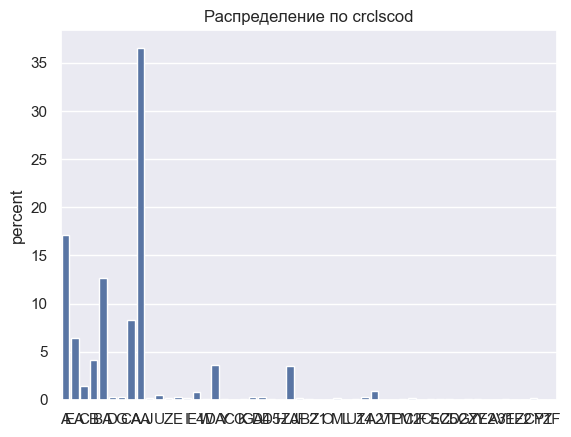

Описание area_impute_mode - Признак, отражающий географическое положение с модой в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 19
['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
Мода_1 - NEW YORK CITY AREA, что составляет 11.16% от всех значений
**************************************************


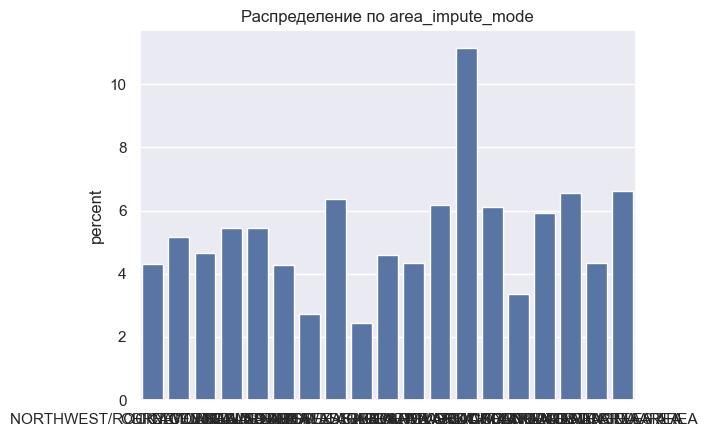

Описание marital_impute_mode - Семейное положение клиента с модой в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 5
['S' 'M' 'A' 'U' 'B']
marital_impute_mode
U    0.384802
M    0.313594
S    0.177923
B    0.071804
A    0.051876
Name: proportion, dtype: float64
**************************************************


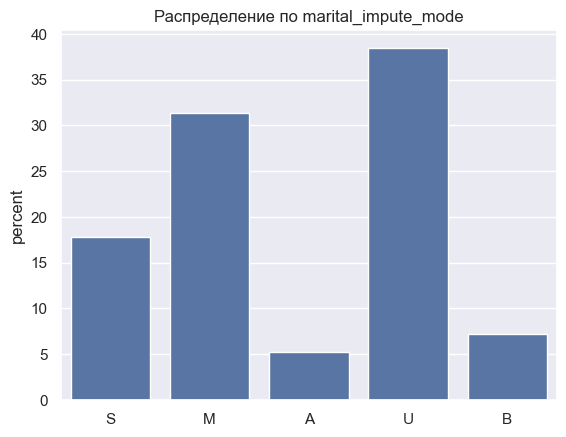

Описание prizm_social_one_Missing - Признак, отражающий социальный статус с "missing" в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 6
['S' 'U' 'T' 'C' 'Missing' 'R']
prizm_social_one_Missing
S          0.323351
U          0.237696
C          0.171402
T          0.151049
Missing    0.067123
R          0.049379
Name: proportion, dtype: float64
**************************************************


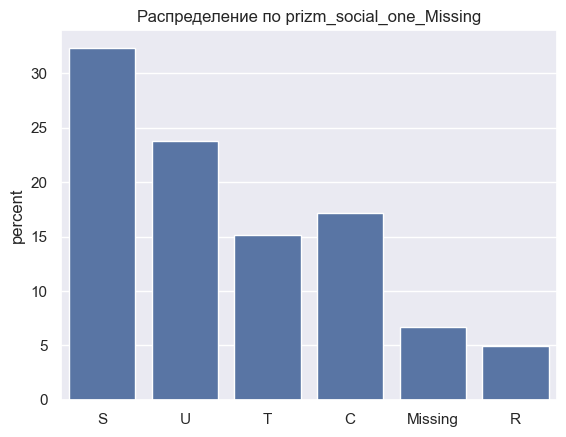

Описание HHstatin_Missing - Признак, относящийся к статусу домашнего хозяйства с "missing" в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 7
['C' 'I' 'Missing' 'B' 'A' 'G' 'H']
HHstatin_Missing
C          0.395054
Missing    0.373357
I          0.124702
A          0.047074
B          0.032677
G          0.017815
H          0.009322
Name: proportion, dtype: float64
**************************************************


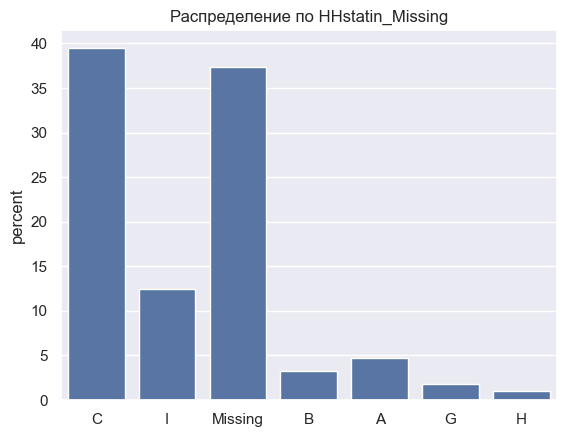

Описание dwllsize_Missing - Признак, относящийся к размеру жилья с "missing" в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 16
['A' 'D' 'O' 'Missing' 'E' 'J' 'C' 'B' 'I' 'N' 'K' 'L' 'G' 'H' 'M' 'F']
Мода_1 - A, что составляет 47.66% от всех значений
**************************************************


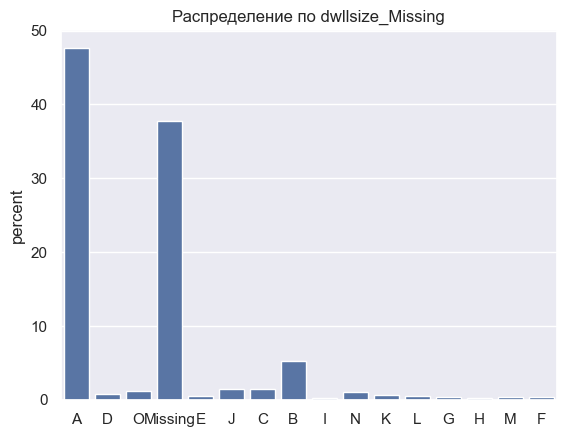

Описание ethnic_Missing - Признак, касающийся этнической принадлежности с "missing" в пропусках
Количество пропущенных значений: 0, что составляет 0.00%
Количество категорий: 18
['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' 'Missing' 'R' 'B' 'P' 'X'
 'C']
Мода_1 - N, что составляет 33.69% от всех значений
**************************************************


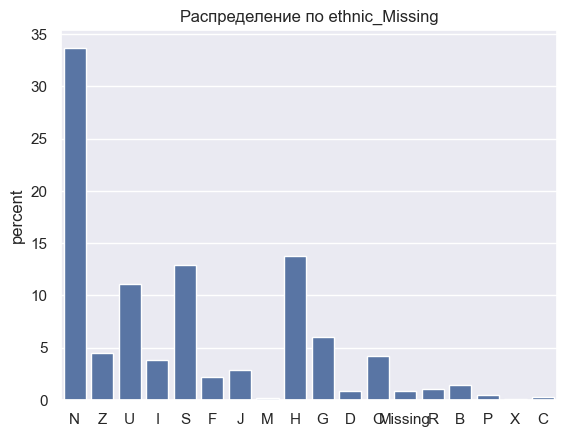

In [118]:
for category in categories:
    check_stat_for_categories(df2, category)
    plt.title('Распределение по ' + category)
    sns.countplot(data=df2, x=category, stat='percent').set(xlabel='')
    plt.show()

Описание drop_vce_Mean - Среднее значение по потерям голосовых
count    98908.000000
mean         5.940723
std          8.922449
min          0.000000
25%          0.666667
50%          3.000000
75%          7.666667
max        232.666667
Name: drop_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2682
Доля выбросов: 2.71%
Диапазон "нормальных" значений: -20.33 - 28.67
**************************************************


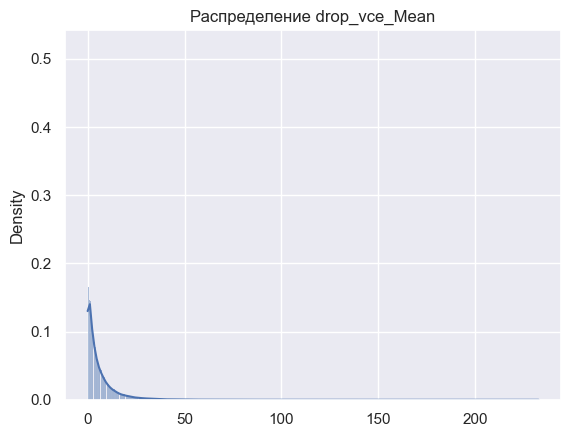

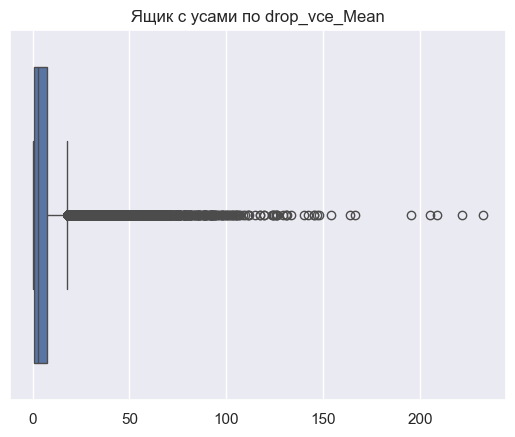

Описание drop_dat_Mean - Среднее значение по потерям данных
count    98908.000000
mean         0.040425
std          0.880794
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        207.333333
Name: drop_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2560
Доля выбросов: 2.59%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


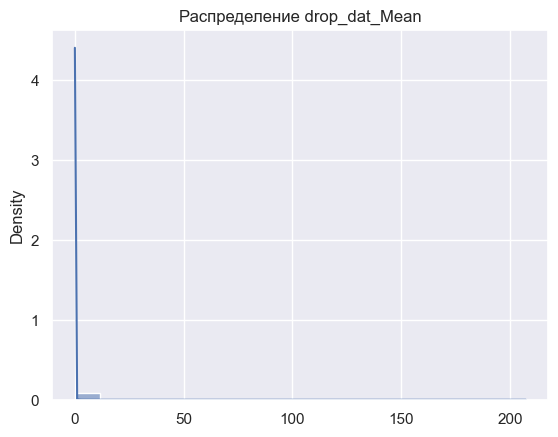

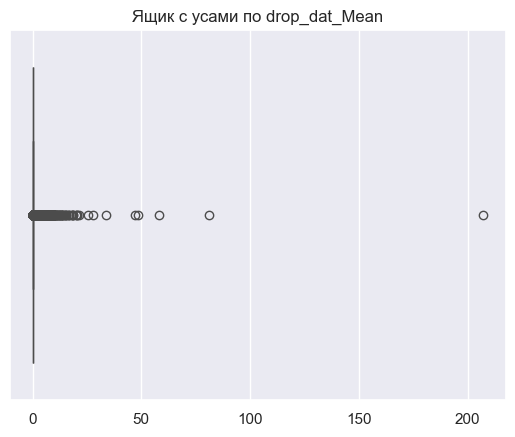

Описание blck_vce_Mean - Среднее количество заблокированных голосовых вызовов
count    98908.000000
mean         4.012004
std         10.602014
min          0.000000
25%          0.000000
50%          1.000000
75%          3.666667
max        385.333333
Name: blck_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 6110
Доля выбросов: 6.18%
Диапазон "нормальных" значений: -11.00 - 14.67
**************************************************


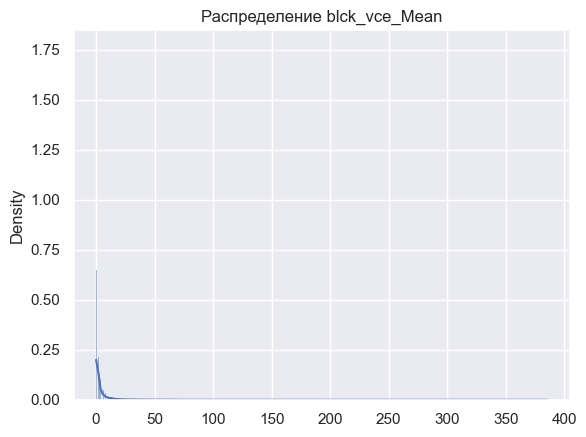

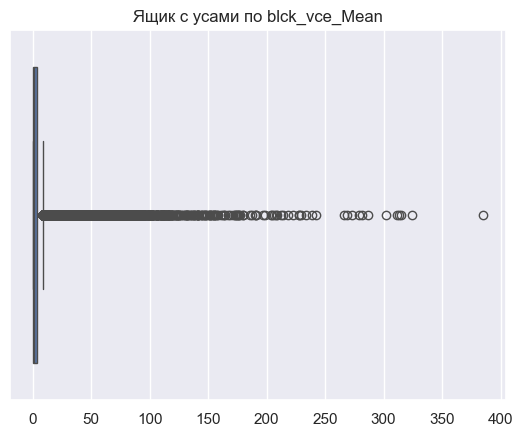

Описание blck_dat_Mean - Среднее количество заблокированных данных
count    98908.000000
mean         0.025734
std          1.497919
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        413.333333
Name: blck_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1206
Доля выбросов: 1.22%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


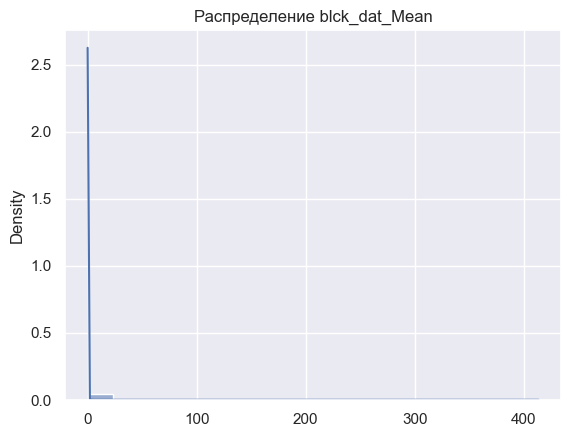

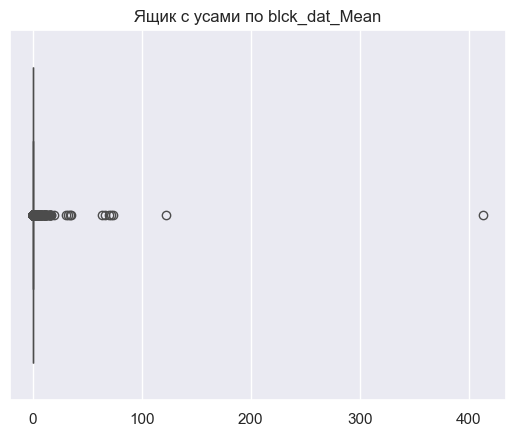

Описание unan_vce_Mean - Среднее количество неоплаченных голосовых вызовов
count    98908.000000
mean        27.699290
std         38.185163
min          0.000000
25%          5.000000
50%         15.666667
75%         35.666667
max        848.666667
Name: unan_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2497
Доля выбросов: 2.52%
Диапазон "нормальных" значений: -87.00 - 127.67
**************************************************


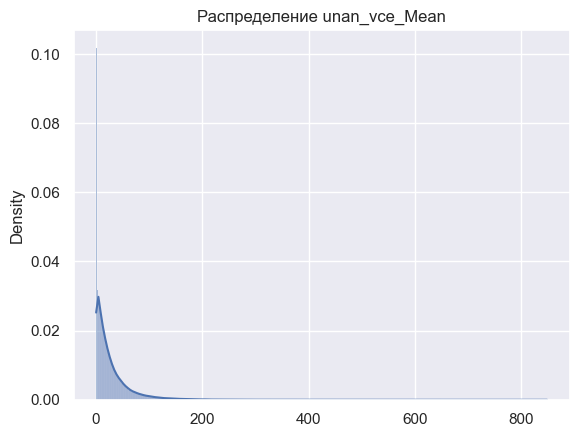

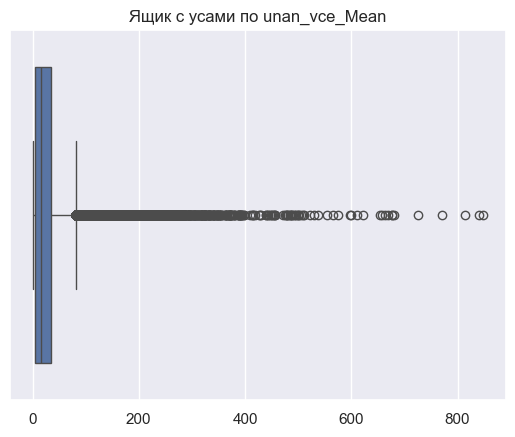

Описание unan_dat_Mean - Среднее количество неоплаченных данных
count    98908.000000
mean         0.029509
std          0.493453
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.666667
Name: unan_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 3084
Доля выбросов: 3.12%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


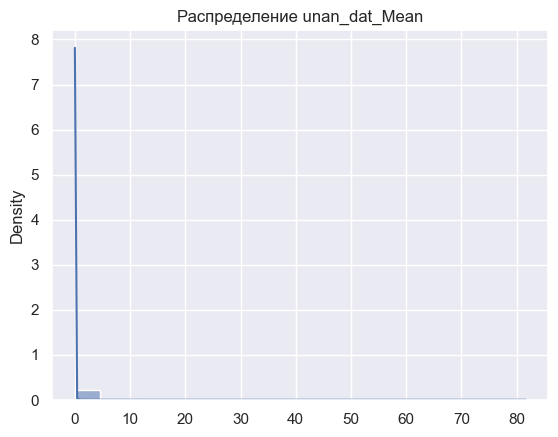

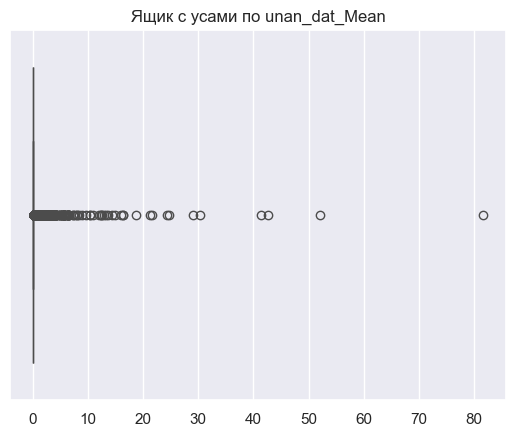

Описание plcd_vce_Mean - 
count    98908.000000
mean       144.546865
std        157.608066
min          0.000000
25%         38.333333
50%        100.333333
75%        198.333333
max       2289.000000
Name: plcd_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1338
Доля выбросов: 1.35%
Диапазон "нормальных" значений: -441.67 - 678.33
**************************************************


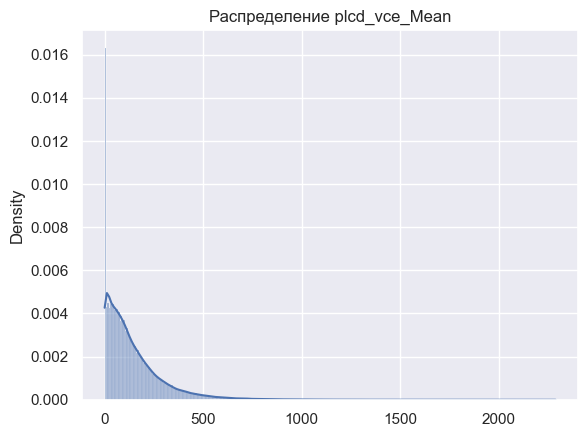

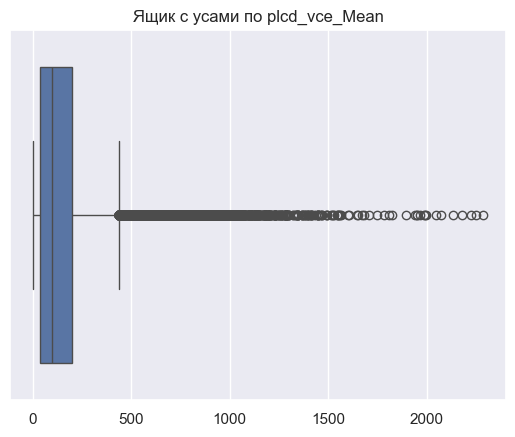

Описание plcd_dat_Mean - 
count    98908.000000
mean         0.867328
std          9.042931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        733.666667
Name: plcd_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 14804
Доля выбросов: 14.97%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


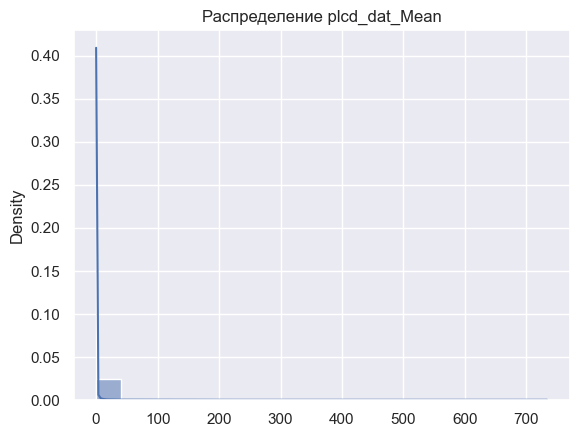

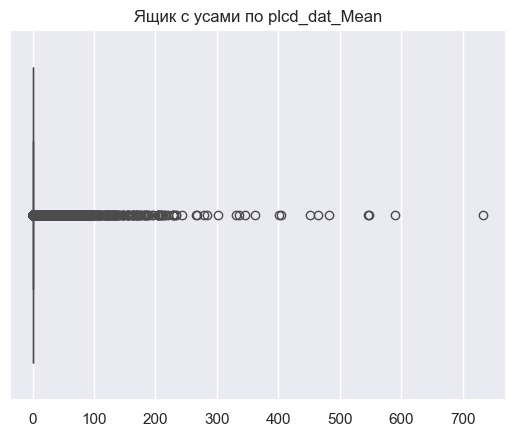

Описание recv_vce_Mean - Среднее количество полученных голосовых сообщений
count    98908.000000
mean        54.907827
std         86.302319
min          0.000000
25%          5.333333
50%         26.666667
75%         71.333333
max       3369.333333
Name: recv_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2526
Доля выбросов: 2.55%
Диапазон "нормальных" значений: -192.67 - 269.33
**************************************************


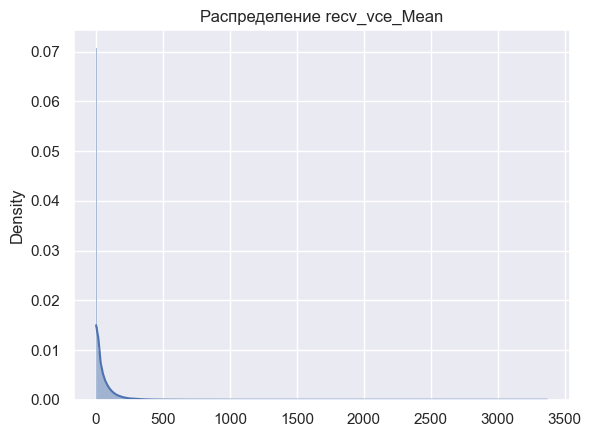

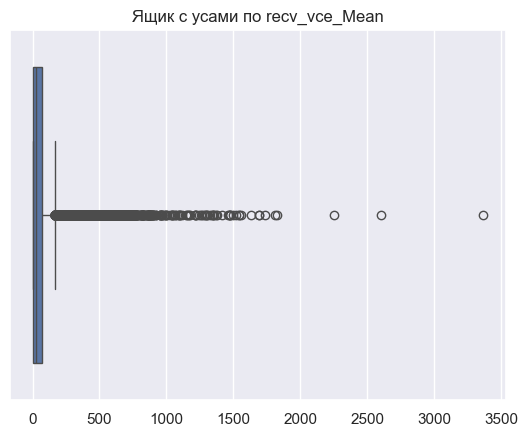

Описание recv_sms_Mean - Среднее количество полученных SMS
count    98908.000000
mean         0.042548
std          1.364838
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        247.666667
Name: recv_sms_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 863
Доля выбросов: 0.87%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


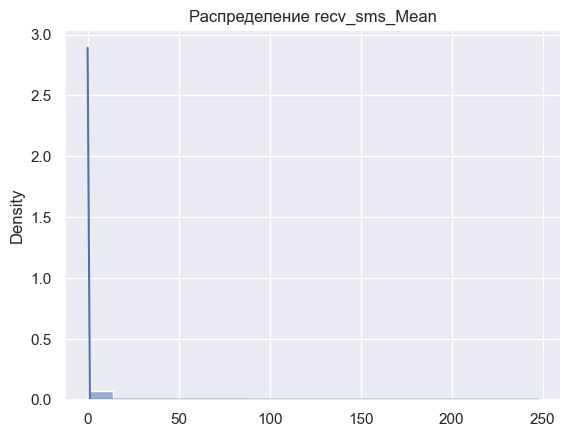

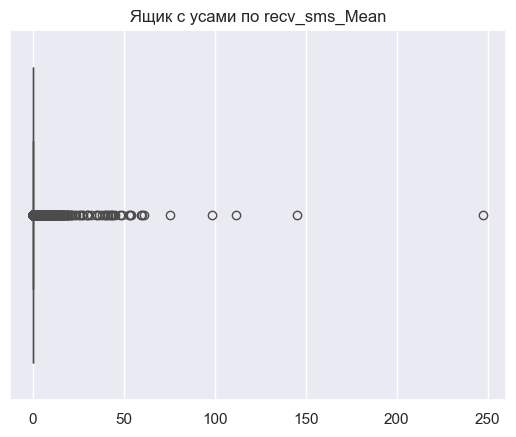

Описание comp_vce_Mean - 
count    98908.000000
mean       108.663765
std        118.134123
min          0.000000
25%         28.666667
50%         75.666667
75%        149.333333
max       1894.333333
Name: comp_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1296
Доля выбросов: 1.31%
Диапазон "нормальных" значений: -333.33 - 511.33
**************************************************


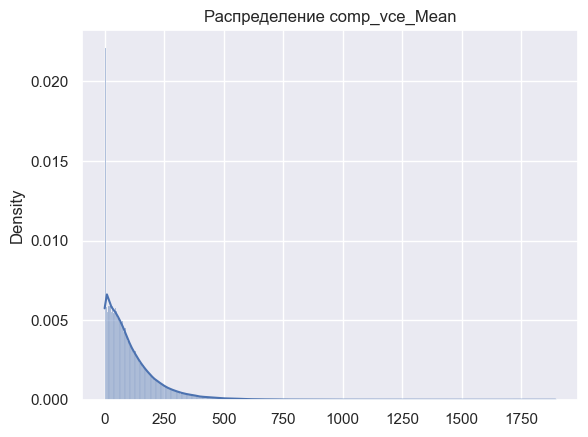

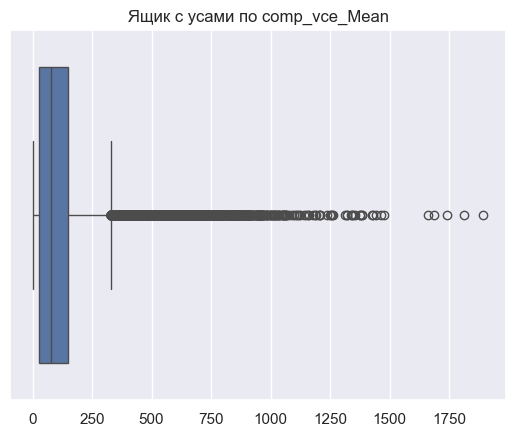

Описание comp_dat_Mean - 
count    98908.000000
mean         0.771660
std          8.120988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        559.333333
Name: comp_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 13235
Доля выбросов: 13.38%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


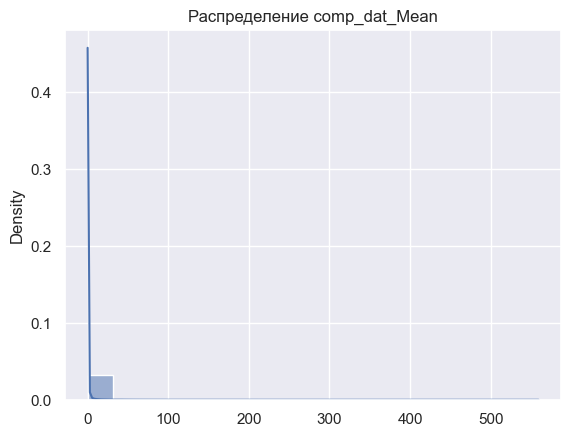

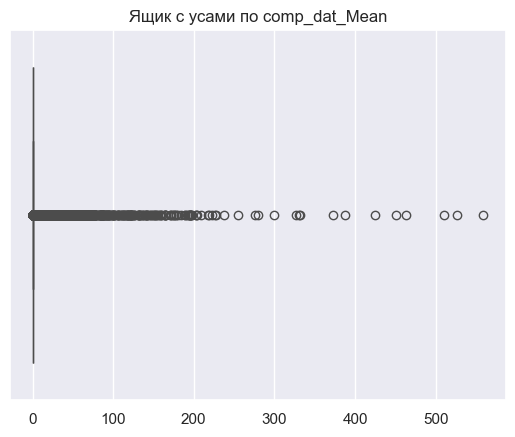

Описание custcare_Mean - Среднее количество обращений в службу поддержки
count    98908.000000
mean         1.785218
std          5.319155
min          0.000000
25%          0.000000
50%          0.000000
75%          1.666667
max        675.333333
Name: custcare_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 7335
Доля выбросов: 7.42%
Диапазон "нормальных" значений: -5.00 - 6.67
**************************************************


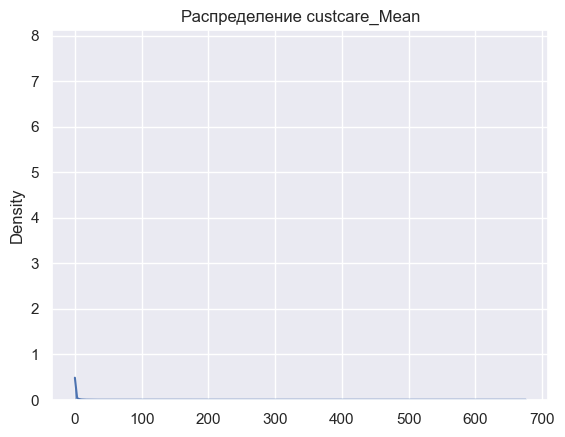

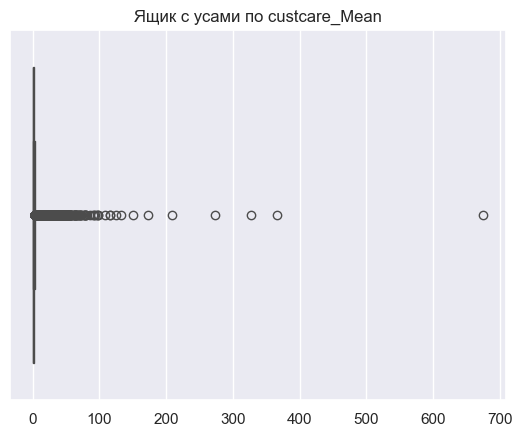

Описание ccrndmou_Mean - ?Среднее значение по звонкам с мобильных номеров
count    98908.000000
mean         4.651602
std         12.754095
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        861.333333
Name: ccrndmou_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 8169
Доля выбросов: 8.26%
Диапазон "нормальных" значений: -12.00 - 16.00
**************************************************


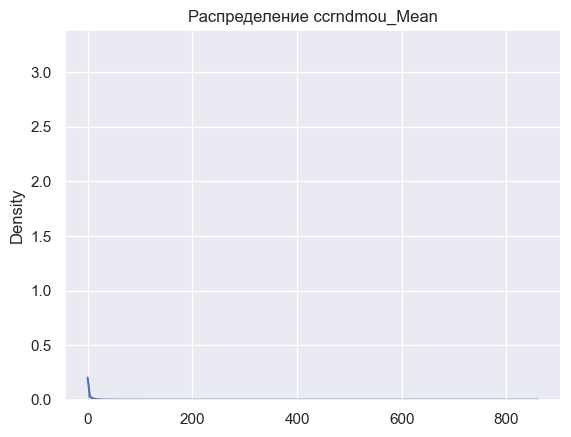

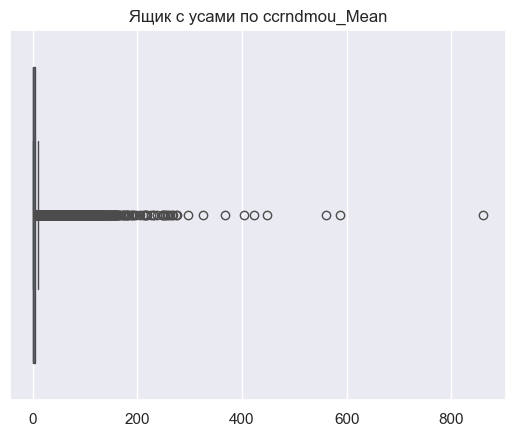

Описание cc_mou_Mean - ?Среднее значение по звонкам с мобильных номеров
count    98908.000000
mean         3.671269
std         10.532288
min          0.000000
25%          0.000000
50%          0.000000
75%          2.856667
max        602.950000
Name: cc_mou_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 9181
Доля выбросов: 9.28%
Диапазон "нормальных" значений: -8.57 - 11.43
**************************************************


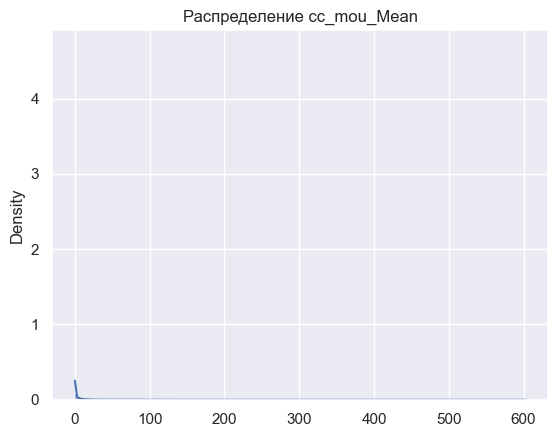

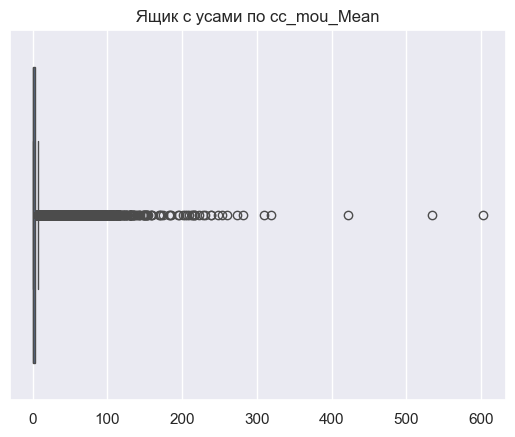

Описание inonemin_Mean - Среднее количество вызовов, длительность которых составляет более 1 минуты
count    98908.000000
mean        29.654979
std         55.413977
min          0.000000
25%          2.666667
50%         12.333333
75%         35.416667
max       3086.666667
Name: inonemin_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 3500
Доля выбросов: 3.54%
Диапазон "нормальных" значений: -95.58 - 133.67
**************************************************


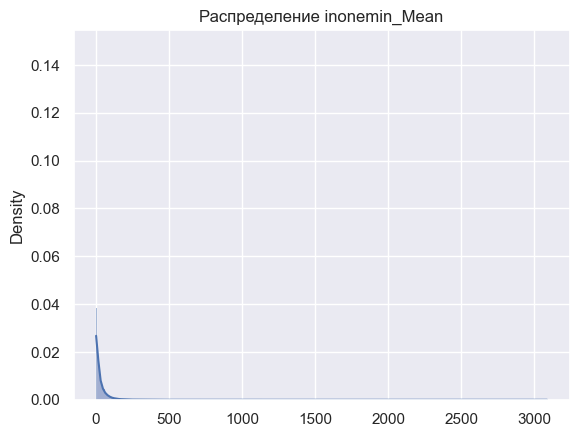

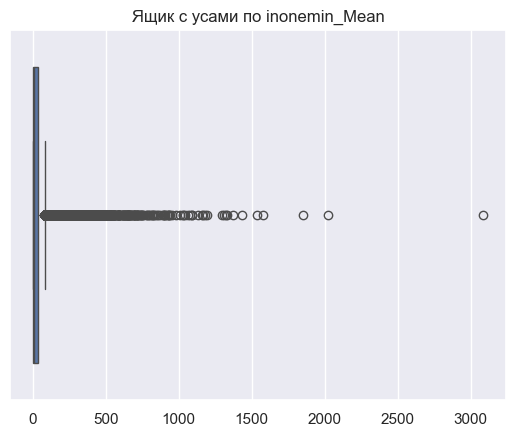

Описание threeway_Mean - 
count    98908.000000
mean         0.282522
std          1.079065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.333333
max         66.000000
Name: threeway_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 5932
Доля выбросов: 6.00%
Диапазон "нормальных" значений: -1.00 - 1.33
**************************************************


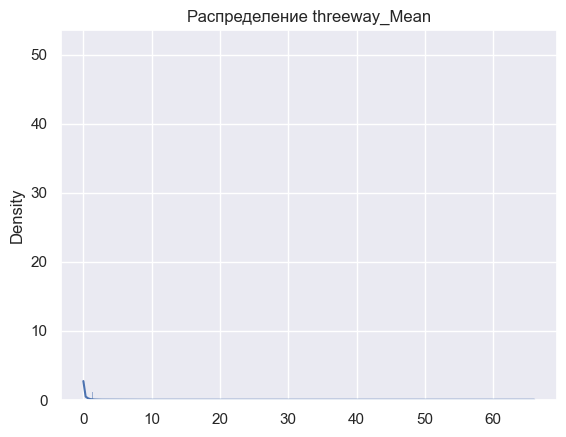

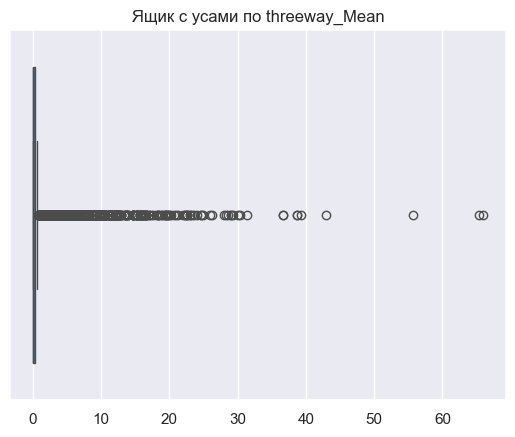

Описание mou_cvce_Mean - 
count    98908.000000
mean       227.258737
std        263.501442
min          0.000000
25%         49.112500
50%        145.980000
75%        308.955000
max       4514.453333
Name: mou_cvce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1508
Доля выбросов: 1.52%
Диапазон "нормальных" значений: -730.41 - 1088.48
**************************************************


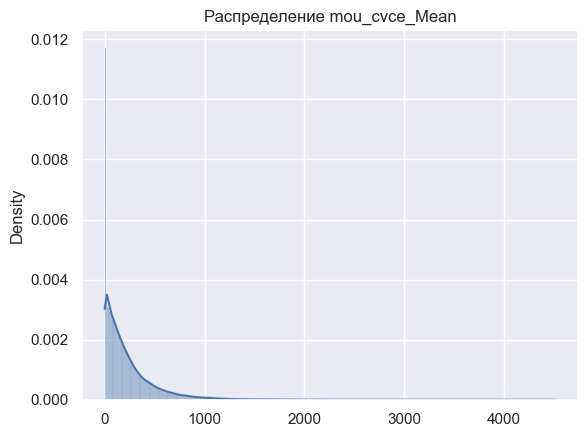

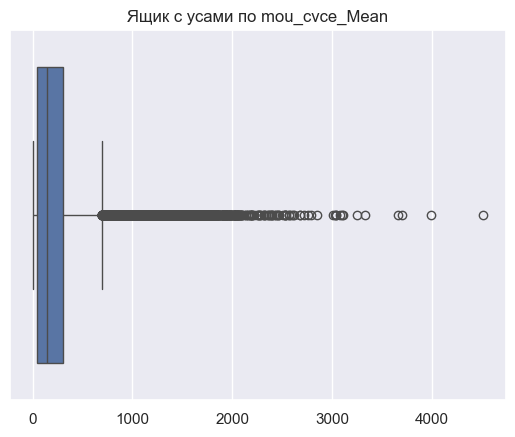

Описание mou_cdat_Mean - 
count    98908.000000
mean         1.836439
std         23.701319
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3032.050000
Name: mou_cdat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 13235
Доля выбросов: 13.38%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


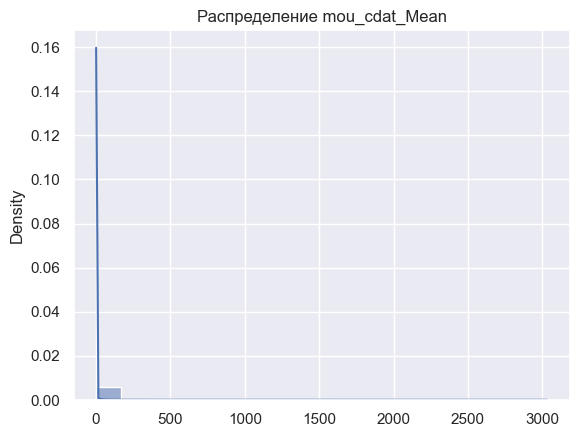

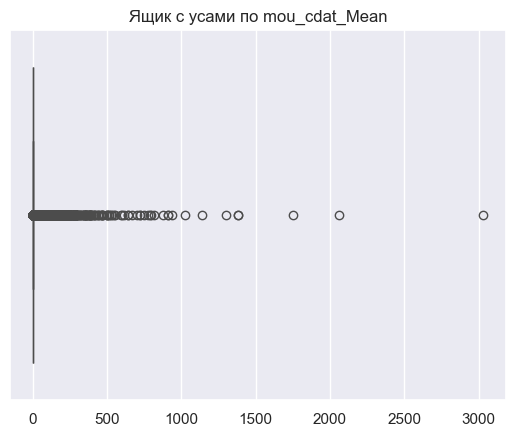

Описание mou_rvce_Mean - 
count    98908.000000
mean       111.342357
std        162.115052
min          0.000000
25%          7.660000
50%         50.096667
75%        149.156667
max       3287.250000
Name: mou_rvce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2359
Доля выбросов: 2.39%
Диапазон "нормальных" значений: -416.83 - 573.65
**************************************************


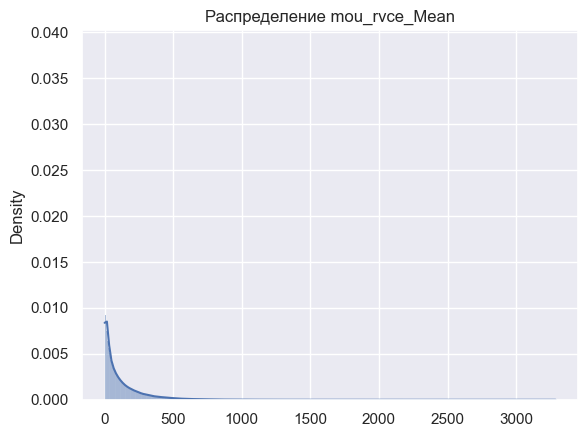

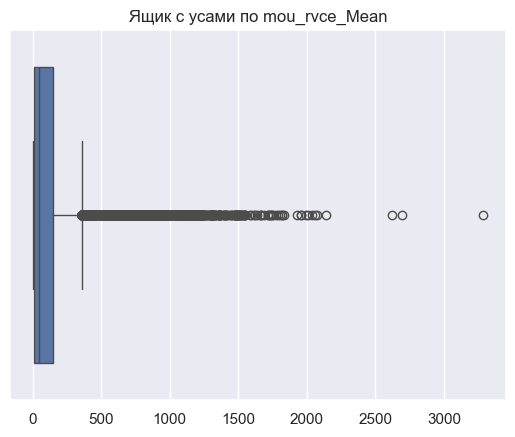

Описание owylis_vce_Mean - 
count    98908.000000
mean        24.692708
std         34.271674
min          0.000000
25%          3.000000
50%         13.000000
75%         33.000000
max        644.333333
Name: owylis_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2084
Доля выбросов: 2.11%
Диапазон "нормальных" значений: -87.00 - 123.00
**************************************************


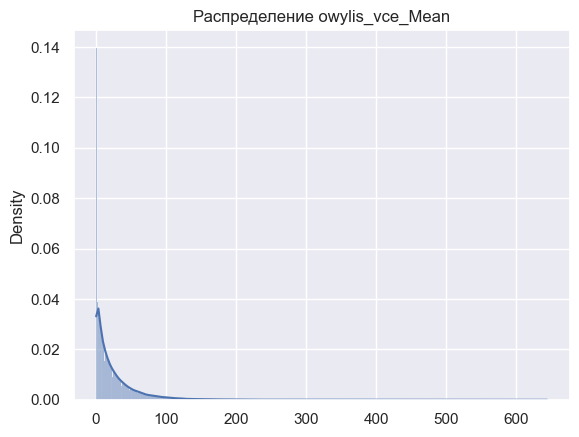

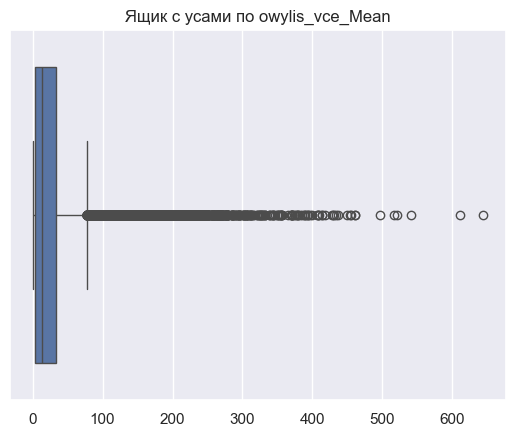

Описание mouowylisv_Mean - 
count    98908.000000
mean        28.392696
std         48.827868
min          0.000000
25%          2.380000
50%         11.958333
75%         34.113333
max       1802.706667
Name: mouowylisv_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 3653
Доля выбросов: 3.69%
Диапазон "нормальных" значений: -92.82 - 129.31
**************************************************


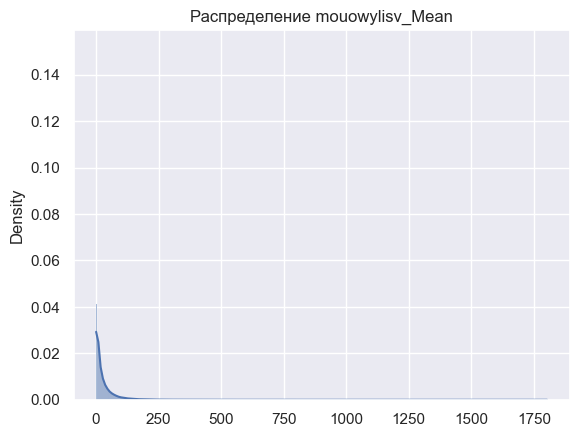

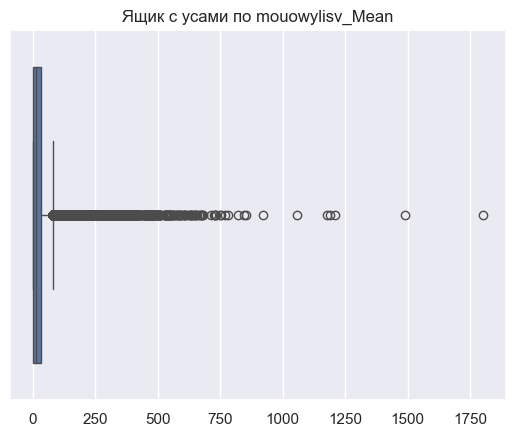

Описание iwylis_vce_Mean - 
count    98908.000000
mean         7.863419
std         16.019165
min          0.000000
25%          0.000000
50%          2.000000
75%          8.666667
max        519.333333
Name: iwylis_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 5015
Доля выбросов: 5.07%
Диапазон "нормальных" значений: -26.00 - 34.67
**************************************************


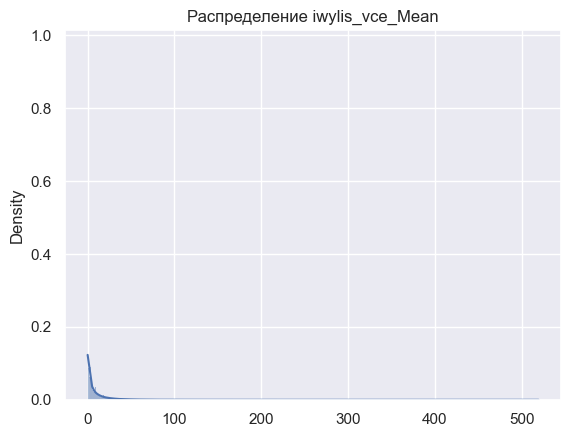

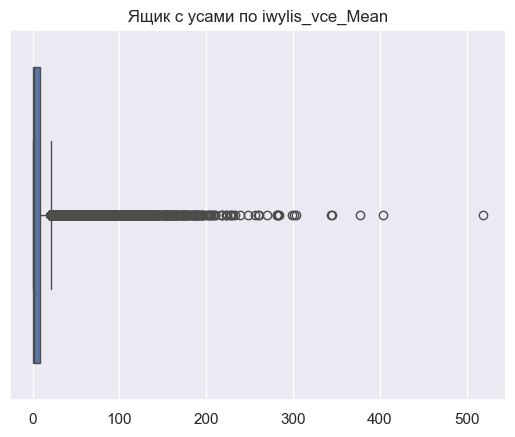

Описание mouiwylisv_Mean - 
count    98908.000000
mean        18.135262
std         41.269833
min          0.000000
25%          0.000000
50%          3.206667
75%         18.217500
max       1703.536667
Name: mouiwylisv_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 6083
Доля выбросов: 6.15%
Диапазон "нормальных" значений: -54.65 - 72.87
**************************************************


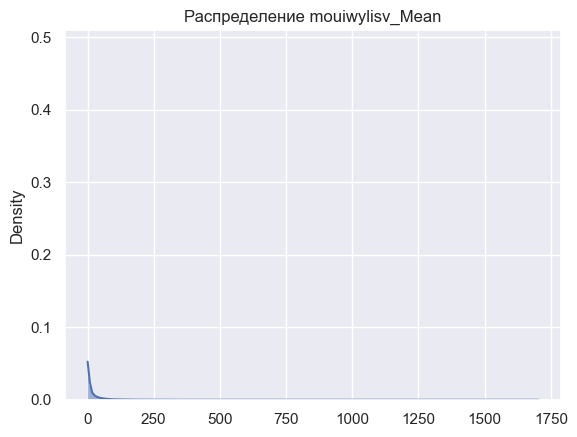

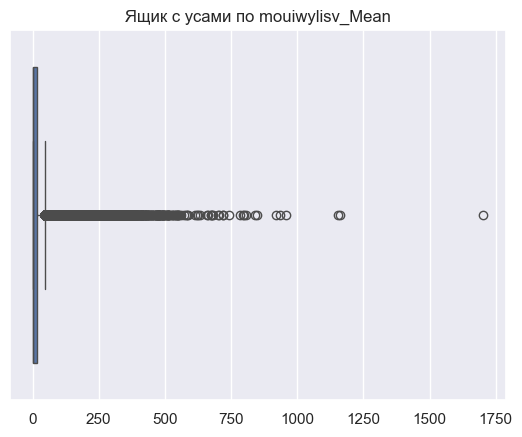

Описание peak_vce_Mean - 
count    98908.000000
mean        88.288682
std        102.613273
min          0.000000
25%         21.666667
50%         60.333333
75%        118.333333
max       2090.666667
Name: peak_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1706
Доля выбросов: 1.72%
Диапазон "нормальных" значений: -268.33 - 408.33
**************************************************


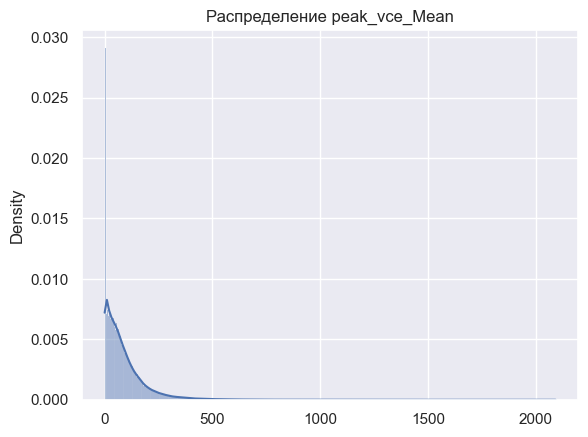

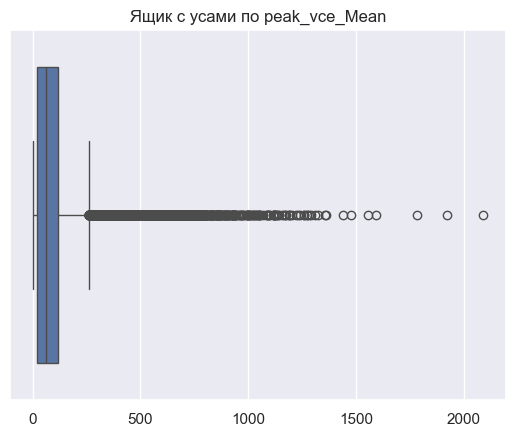

Описание peak_dat_Mean - 
count    98908.000000
mean         0.358171
std          4.075311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        281.000000
Name: peak_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 8846
Доля выбросов: 8.94%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


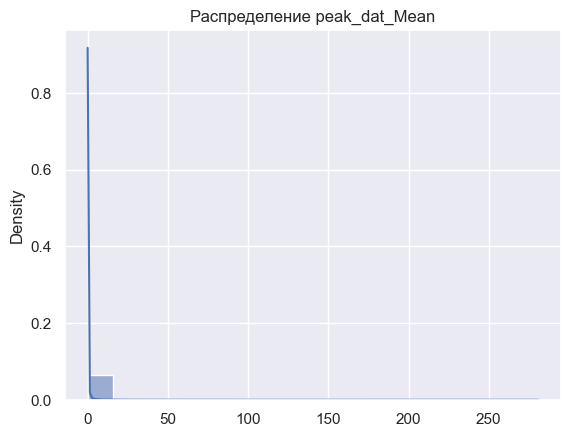

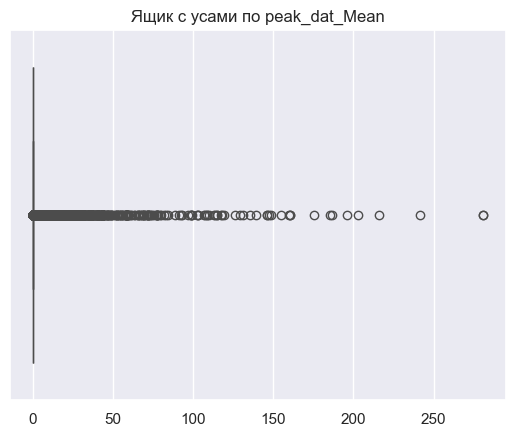

Описание mou_peav_Mean - 
count    98908.000000
mean       173.790164
std        207.071284
min          0.000000
25%         37.699167
50%        115.288333
75%        232.877500
max       4015.346667
Name: mou_peav_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1792
Доля выбросов: 1.81%
Диапазон "нормальных" значений: -547.84 - 818.41
**************************************************


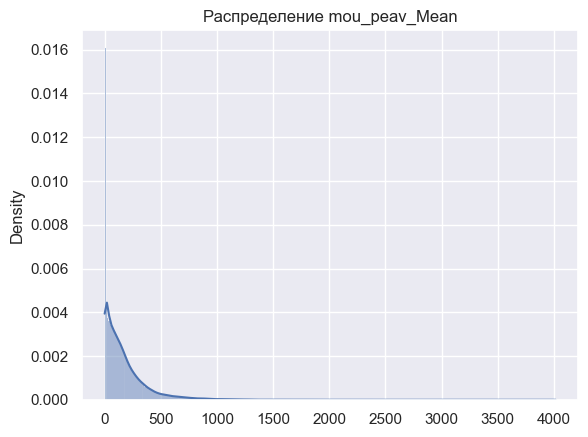

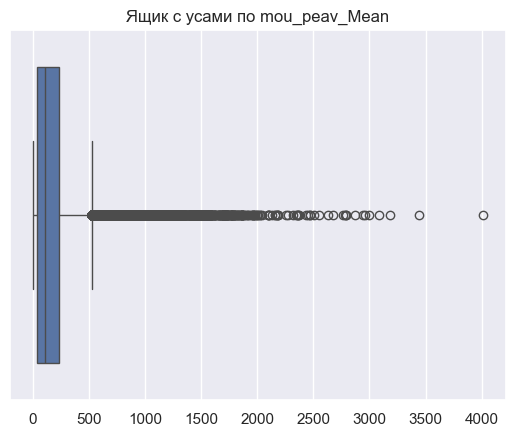

Описание mou_pead_Mean - 
count    98908.000000
mean         0.708083
std          8.431916
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1036.053333
Name: mou_pead_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 8844
Доля выбросов: 8.94%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


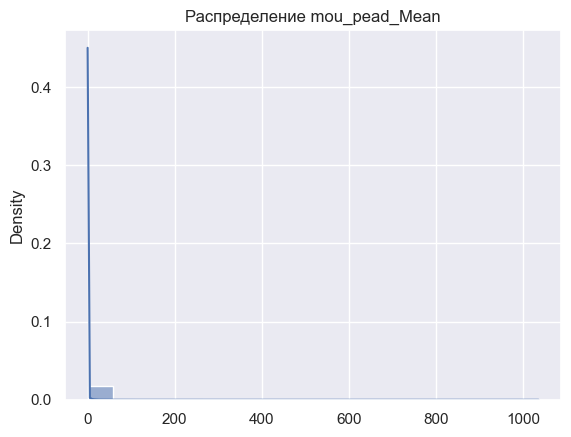

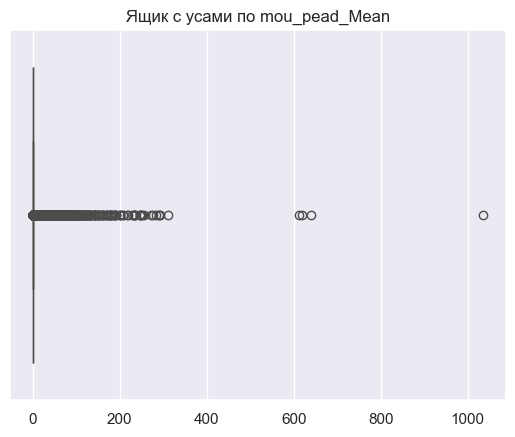

Описание opk_vce_Mean - 
count    98908.000000
mean        65.824419
std         91.092058
min          0.000000
25%         10.333333
50%         34.333333
75%         86.000000
max       1643.333333
Name: opk_vce_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2448
Доля выбросов: 2.48%
Диапазон "нормальных" значений: -216.67 - 313.00
**************************************************


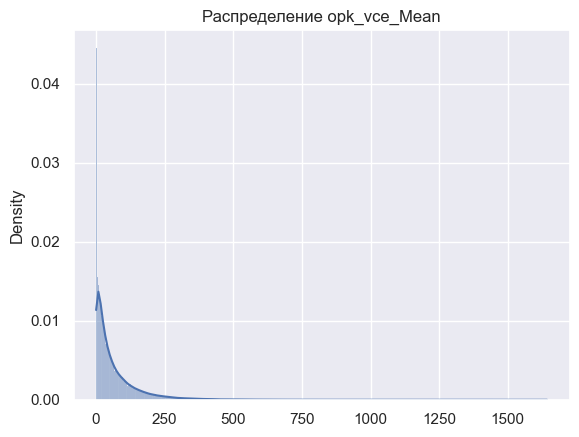

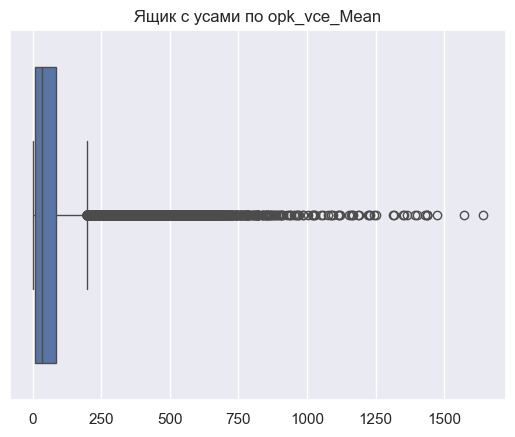

Описание opk_dat_Mean - 
count    98908.000000
mean         0.413492
std          4.626201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        309.666667
Name: opk_dat_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 9480
Доля выбросов: 9.58%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


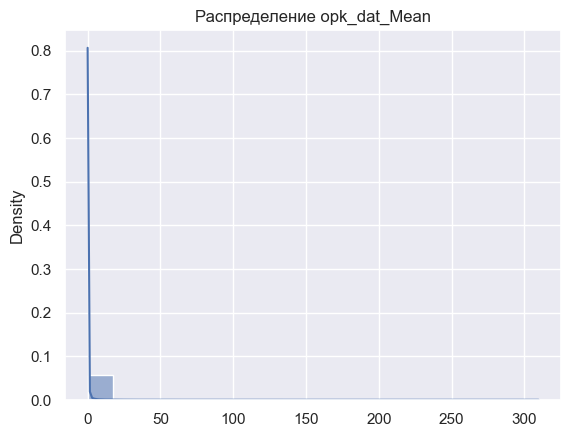

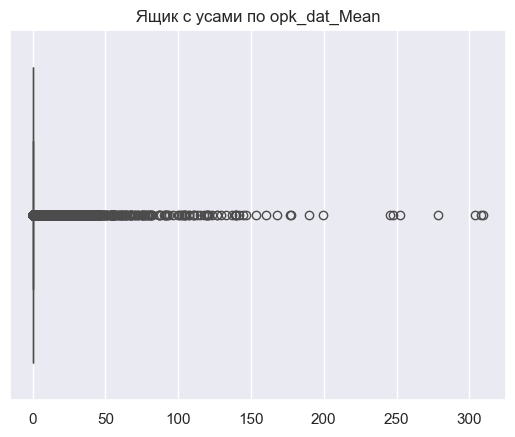

Описание mou_opkv_Mean - 
count    98908.000000
mean       164.754929
std        236.362128
min          0.000000
25%         18.570000
50%         75.708333
75%        210.456667
max       4337.893333
Name: mou_opkv_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 3069
Доля выбросов: 3.10%
Диапазон "нормальных" значений: -557.09 - 786.12
**************************************************


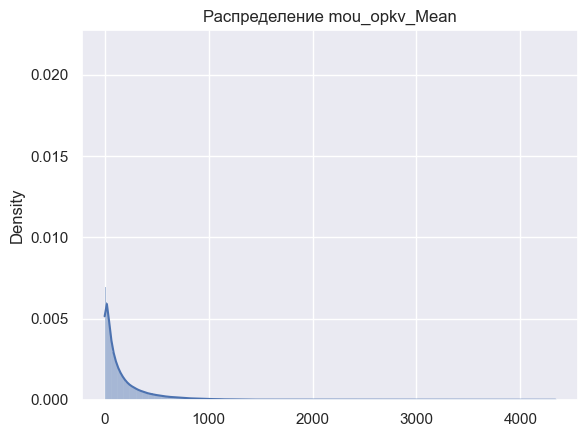

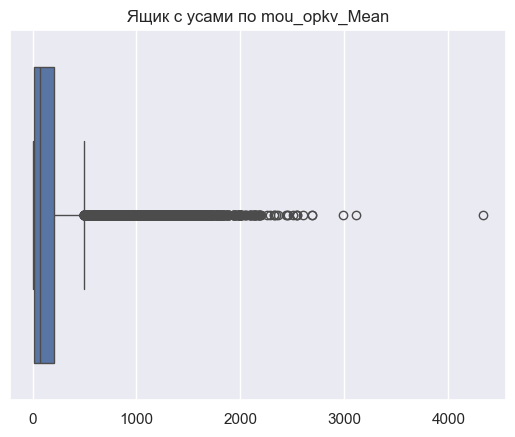

Описание mou_opkd_Mean - 
count    98908.000000
mean         1.127952
std         17.714350
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2922.043333
Name: mou_opkd_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 9492
Доля выбросов: 9.60%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


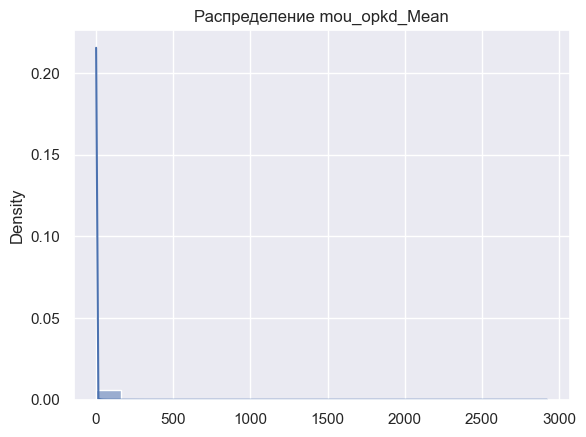

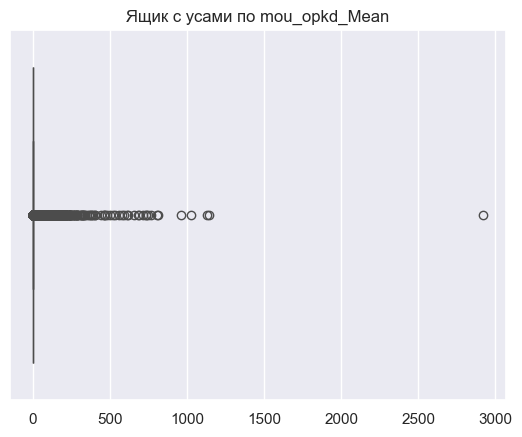

Описание drop_blk_Mean - 
count    98908.000000
mean        10.018886
std         15.339875
min          0.000000
25%          1.666667
50%          5.333333
75%         12.333333
max        489.666667
Name: drop_blk_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2995
Доля выбросов: 3.03%
Диапазон "нормальных" значений: -30.33 - 44.33
**************************************************


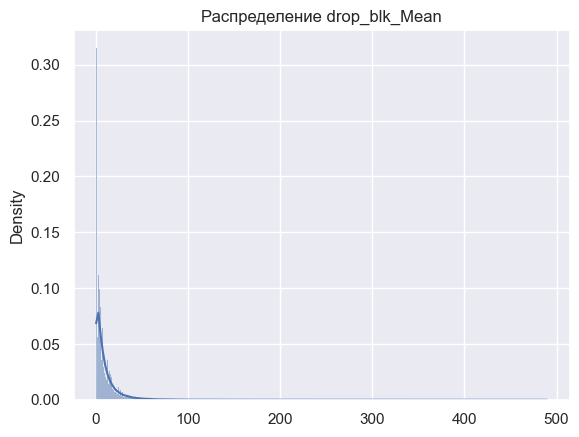

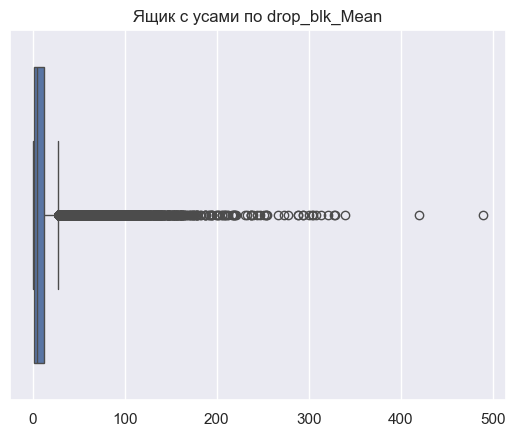

Описание attempt_Mean - 
count    98908.000000
mean       145.414193
std        158.684628
min          0.000000
25%         38.333333
50%        100.666667
75%        199.333333
max       2289.000000
Name: attempt_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1349
Доля выбросов: 1.36%
Диапазон "нормальных" значений: -444.67 - 682.33
**************************************************


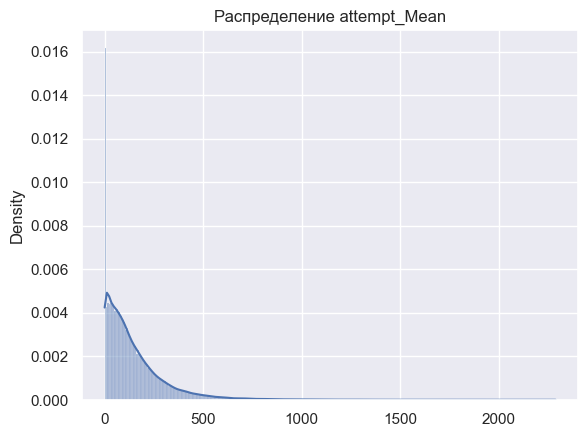

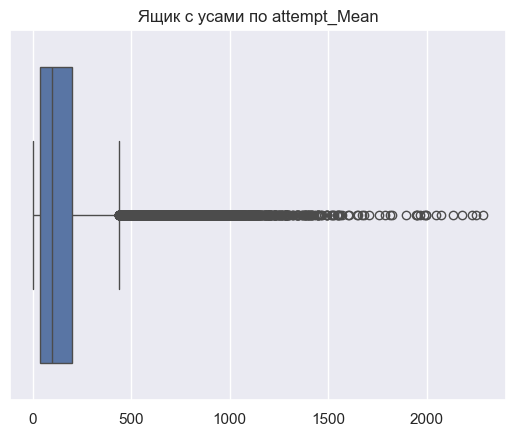

Описание complete_Mean - 
count    98908.000000
mean       109.435425
std        119.146626
min          0.000000
25%         28.666667
50%         76.000000
75%        150.333333
max       1894.333333
Name: complete_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1307
Доля выбросов: 1.32%
Диапазон "нормальных" значений: -336.33 - 515.33
**************************************************


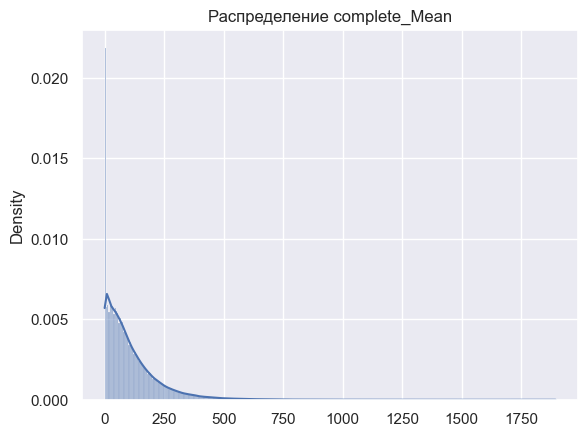

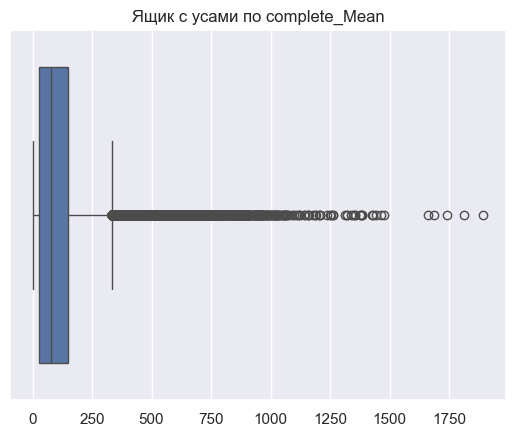

Описание callfwdv_Mean - 
count    98908.000000
mean         0.011425
std          0.539894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.333333
Name: callfwdv_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 425
Доля выбросов: 0.43%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


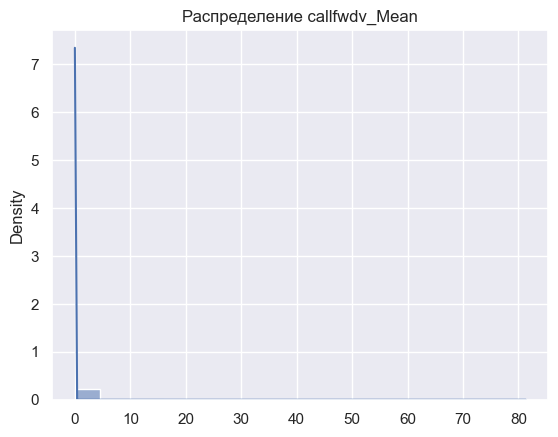

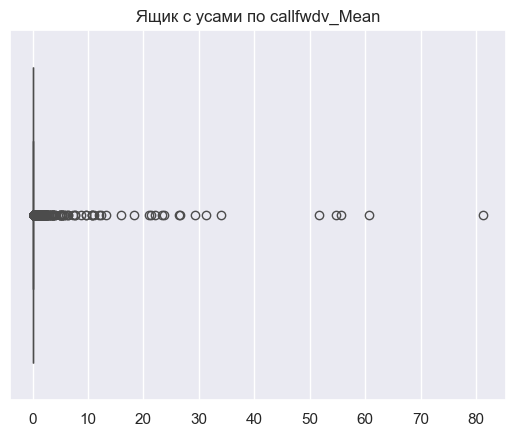

Описание callwait_Mean - 
count    98908.000000
mean         1.773092
std          5.307826
min          0.000000
25%          0.000000
50%          0.333333
75%          1.333333
max        212.666667
Name: callwait_Mean, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 8771
Доля выбросов: 8.87%
Диапазон "нормальных" значений: -4.00 - 5.33
**************************************************


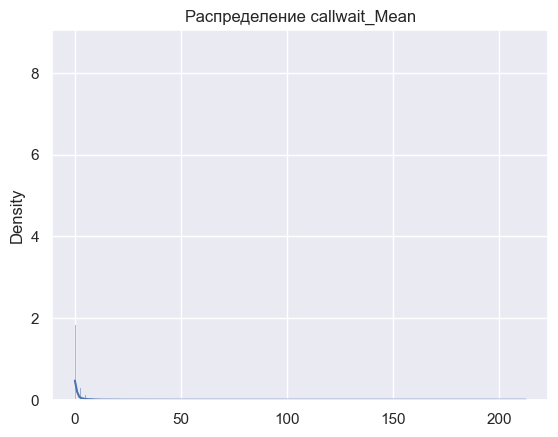

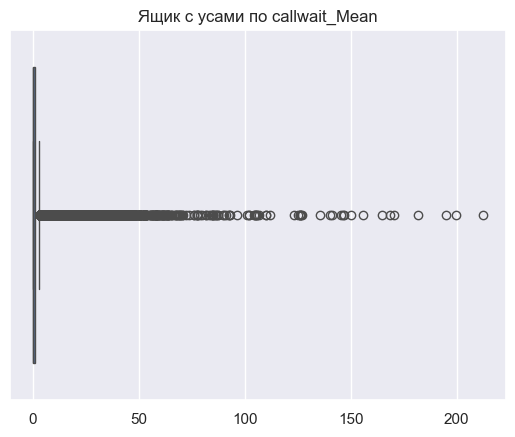

Описание churn - 1 - клиент ушел, 0 - остался
count    98908.000000
mean         0.495804
std          0.499985
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: churn, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Выбросов по threshold = 3 нет
Диапазон "нормальных" значений: -3.00 - 4.00
**************************************************


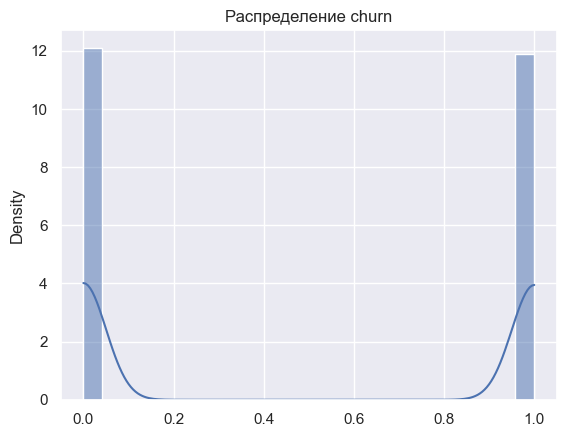

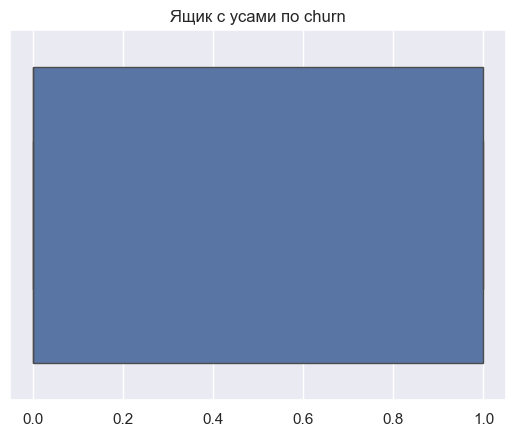

Описание months - 
count    98908.000000
mean        18.870385
std          9.645460
min          6.000000
25%         11.000000
50%         17.000000
75%         24.000000
max         61.000000
Name: months, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Выбросов по threshold = 3 нет
Диапазон "нормальных" значений: -28.00 - 63.00
**************************************************


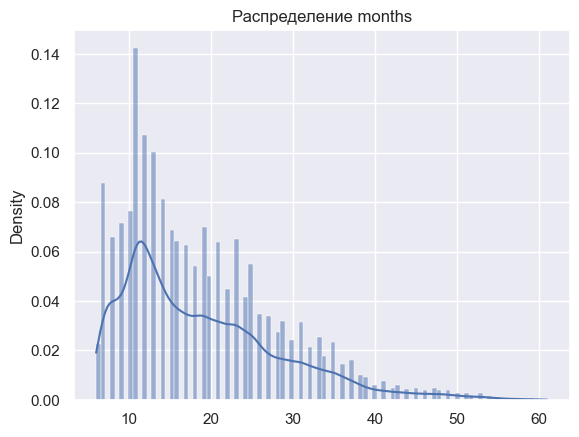

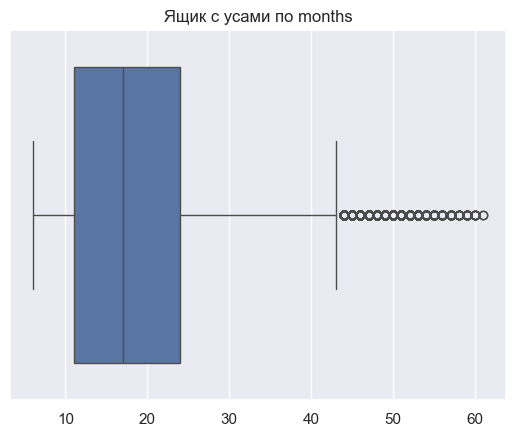

Описание uniqsubs - 
count    98908.000000
mean         1.548399
std          1.075695
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        196.000000
Name: uniqsubs, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 496
Доля выбросов: 0.50%
Диапазон "нормальных" значений: -2.00 - 5.00
**************************************************


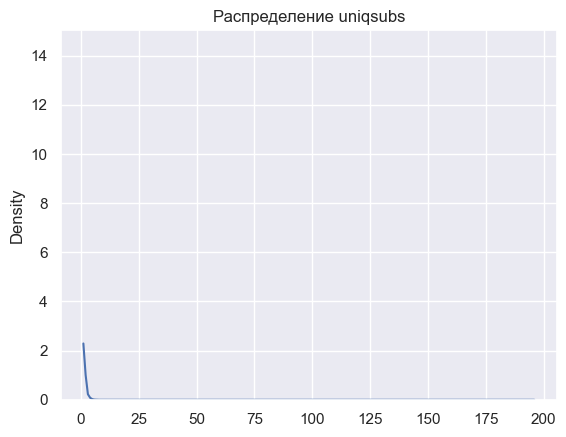

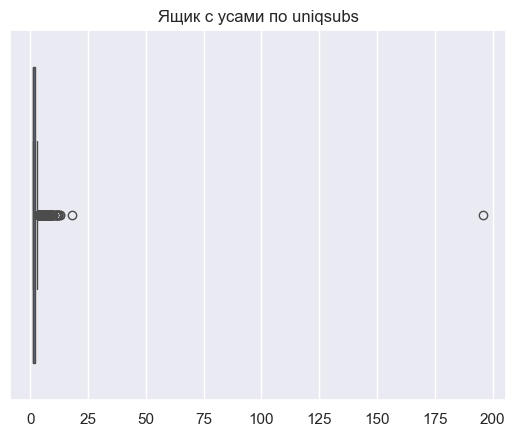

Описание actvsubs - 
count    98908.000000
mean         1.358869
std          0.653620
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         53.000000
Name: actvsubs, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 32
Доля выбросов: 0.03%
Диапазон "нормальных" значений: -2.00 - 5.00
**************************************************


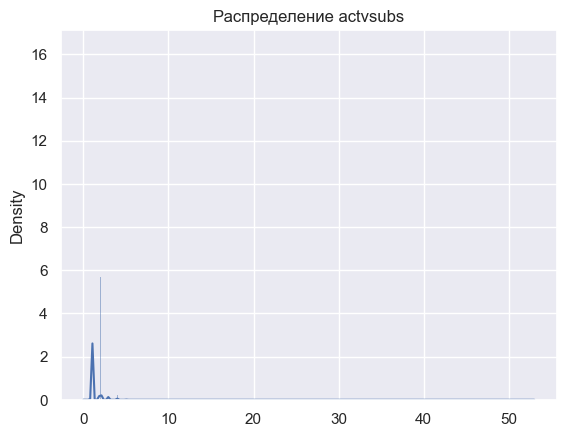

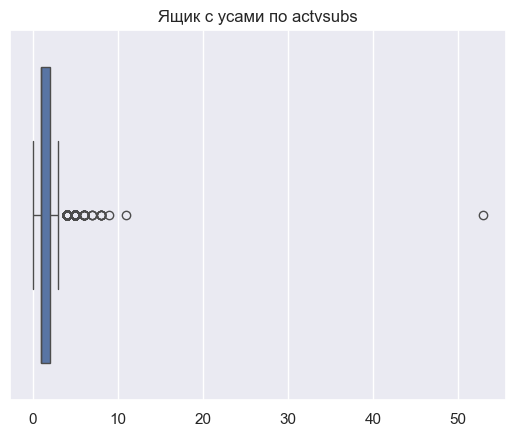

Описание totcalls - Общие значения по числу звонков
count    98908.000000
mean      2876.702441
std       3782.378202
min          0.000000
25%        889.000000
50%       1824.000000
75%       3496.000000
max      98874.000000
Name: totcalls, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2755
Доля выбросов: 2.79%
Диапазон "нормальных" значений: -6932.00 - 11317.00
**************************************************


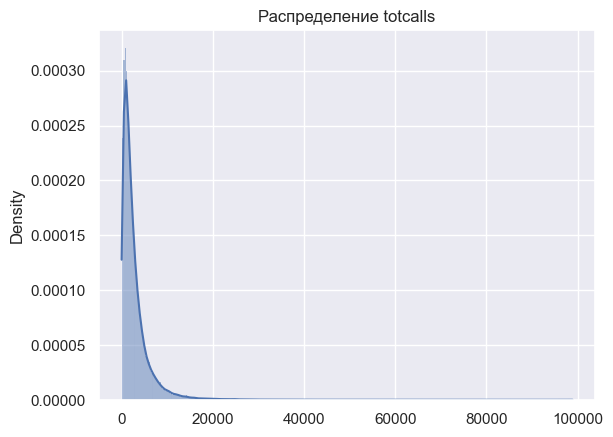

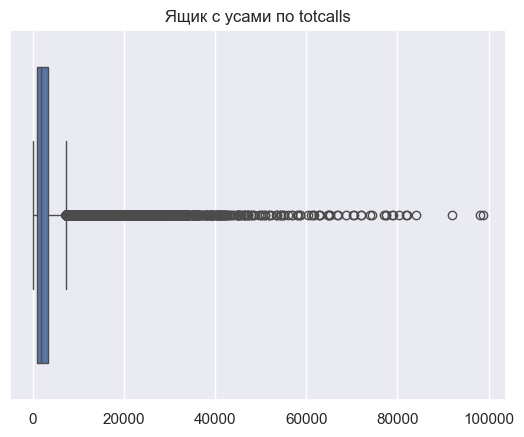

Описание totmou - Общие значения по использованию минут
count     98908.000000
mean       7646.251792
std        8654.458867
min           0.000000
25%        2530.000000
50%        5195.000000
75%        9778.250000
max      233419.096700
Name: totmou, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1993
Доля выбросов: 2.02%
Диапазон "нормальных" значений: -19214.75 - 31523.00
**************************************************


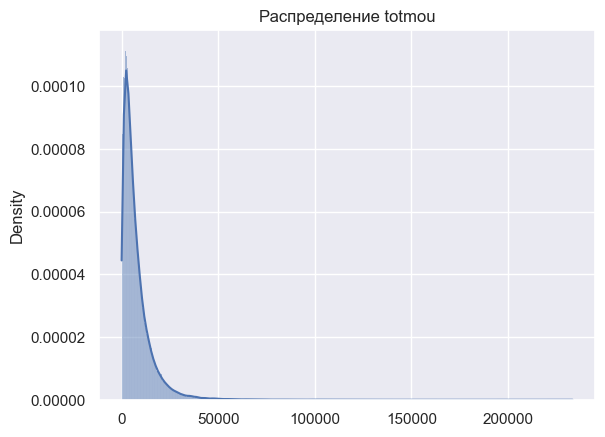

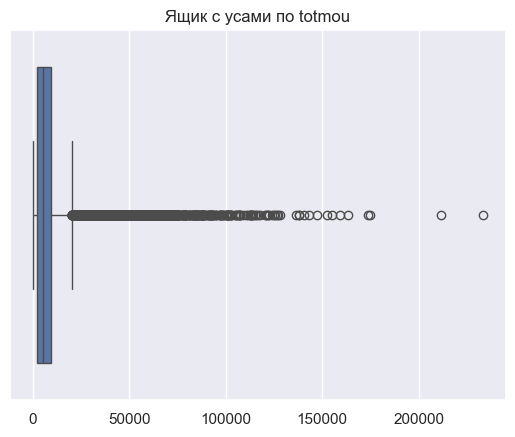

Описание totrev - Общие значения по общим доходам
count    98908.000000
mean      1032.801149
std        851.515790
min          3.650000
25%        520.307500
50%        806.285000
75%       1265.855000
max      27321.500000
Name: totrev, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1955
Доля выбросов: 1.98%
Диапазон "нормальных" значений: -1716.34 - 3502.50
**************************************************


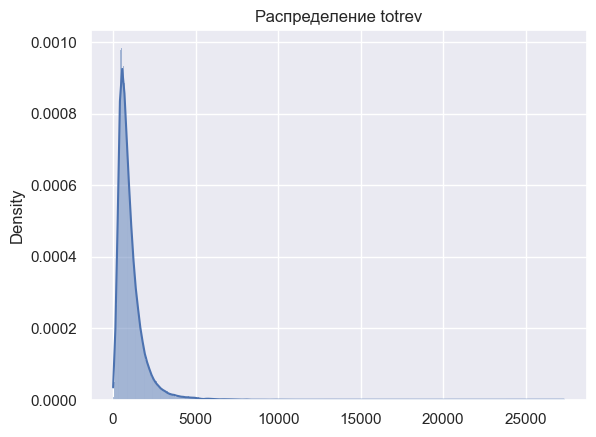

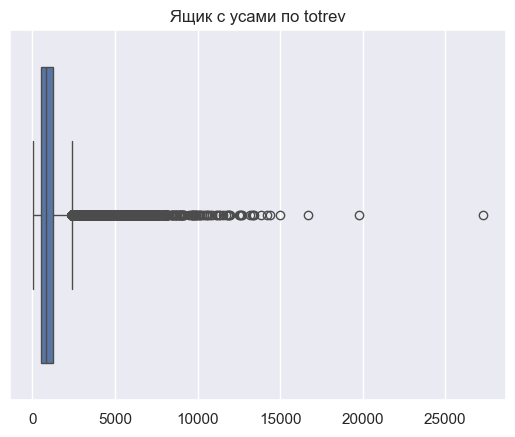

Описание adjrev - 
count    98908.000000
mean       961.026014
std        838.785353
min          2.400000
25%        453.240000
50%        739.470000
75%       1189.925000
max      27071.300000
Name: adjrev, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1945
Доля выбросов: 1.97%
Диапазон "нормальных" значений: -1756.82 - 3399.98
**************************************************


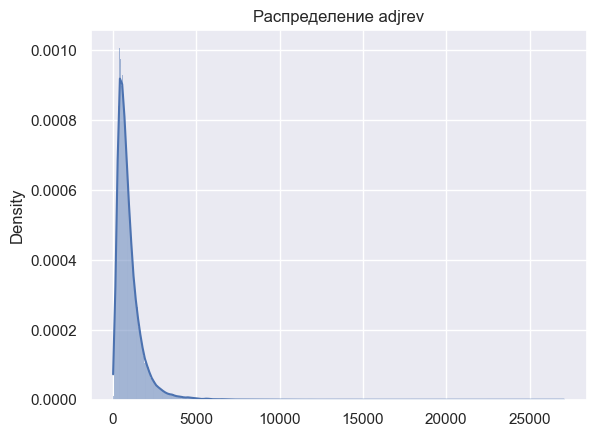

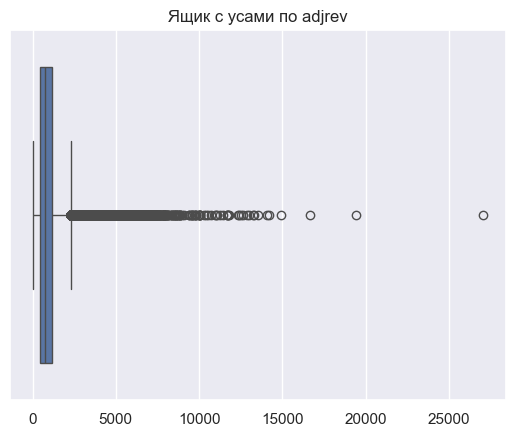

Описание adjmou - 
count     98908.000000
mean       7544.100434
std        8583.004992
min           0.000000
25%        2475.000000
50%        5105.000000
75%        9665.000000
max      232855.100000
Name: adjmou, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1981
Доля выбросов: 2.00%
Диапазон "нормальных" значений: -19095.00 - 31235.00
**************************************************


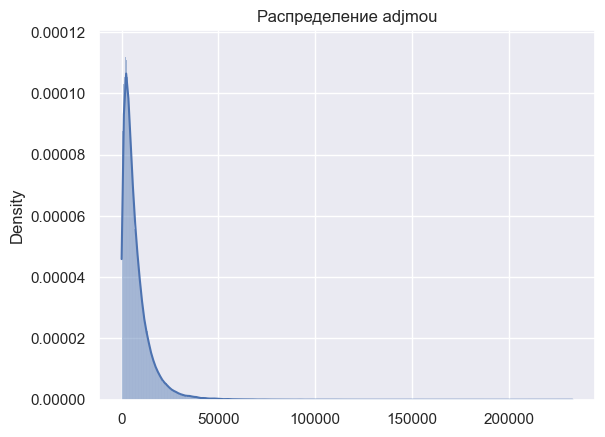

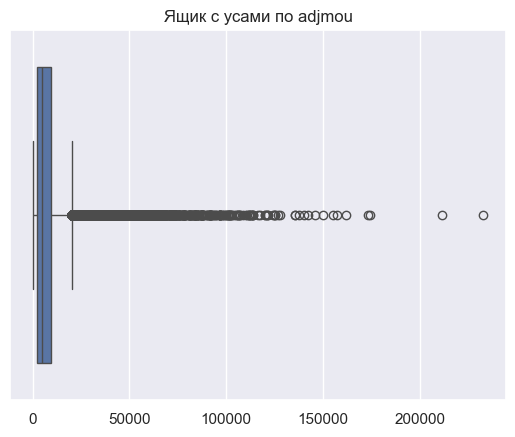

Описание adjqty - 
count    98908.000000
mean      2835.878604
std       3748.205904
min          0.000000
25%        869.000000
50%       1791.000000
75%       3445.000000
max      98705.000000
Name: adjqty, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2763
Доля выбросов: 2.79%
Диапазон "нормальных" значений: -6859.00 - 11173.00
**************************************************


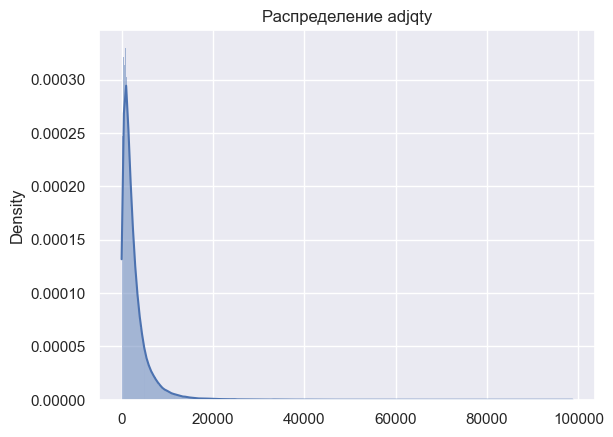

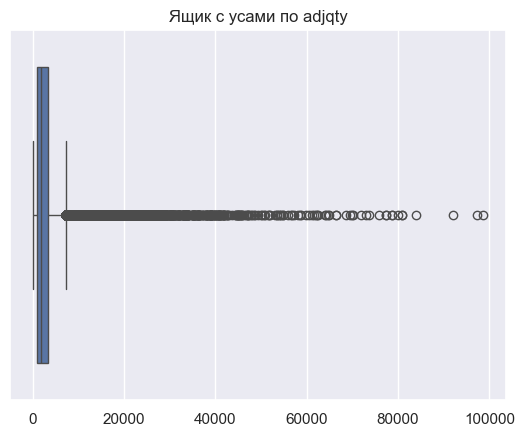

Описание avgrev - 
count    98908.000000
mean        57.808553
std         35.984453
min          0.480000
25%         35.350000
50%         49.810000
75%         69.352500
max        924.270000
Name: avgrev, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1484
Доля выбросов: 1.50%
Диапазон "нормальных" значений: -66.66 - 171.36
**************************************************


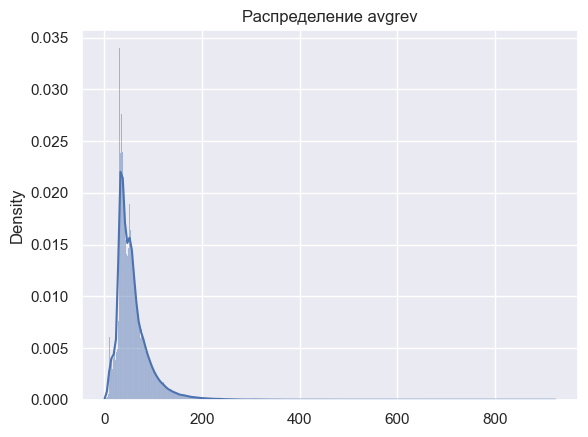

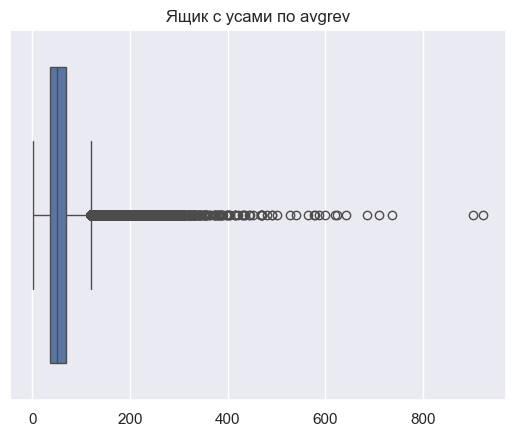

Описание avgmou - 
count    98908.000000
mean       482.084116
std        436.610902
min          0.000000
25%        175.735000
50%        359.270000
75%        653.427500
max       7040.130000
Name: avgmou, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 859
Доля выбросов: 0.87%
Диапазон "нормальных" значений: -1257.34 - 2086.51
**************************************************


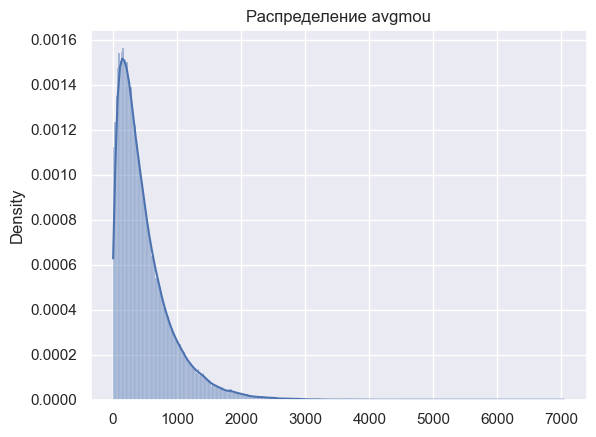

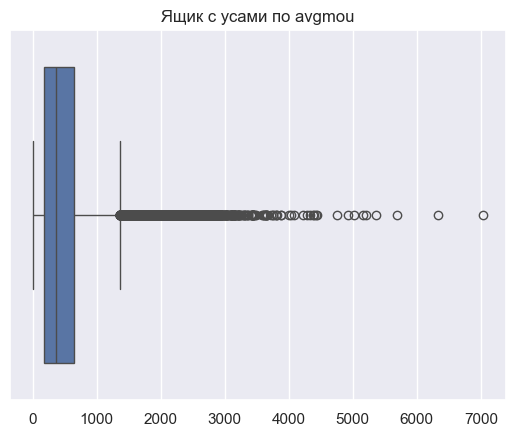

Описание avgqty - 
count    98908.000000
mean       173.036851
std        167.060437
min          0.000000
25%         63.960000
50%        127.165000
75%        227.930000
max       3017.110000
Name: avgqty, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1432
Доля выбросов: 1.45%
Диапазон "нормальных" значений: -427.95 - 719.84
**************************************************


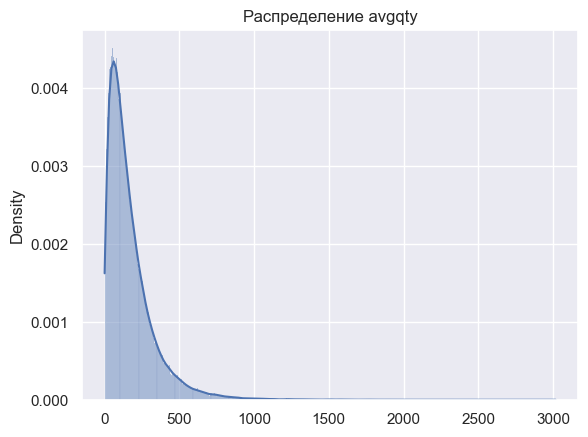

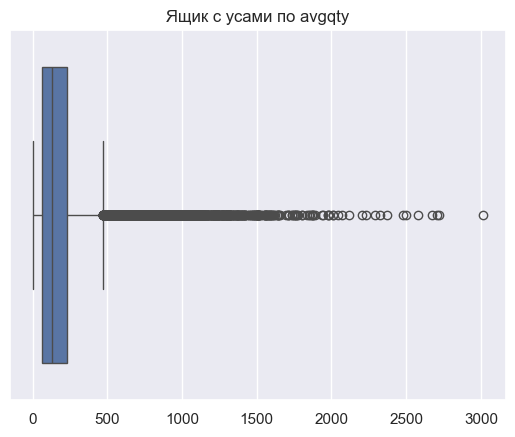

Описание avg3mou - 
count    98908.000000
mean       518.179733
std        531.534237
min          0.000000
25%        151.000000
50%        357.000000
75%        710.000000
max       7716.000000
Name: avg3mou, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1132
Доля выбросов: 1.14%
Диапазон "нормальных" значений: -1526.00 - 2387.00
**************************************************


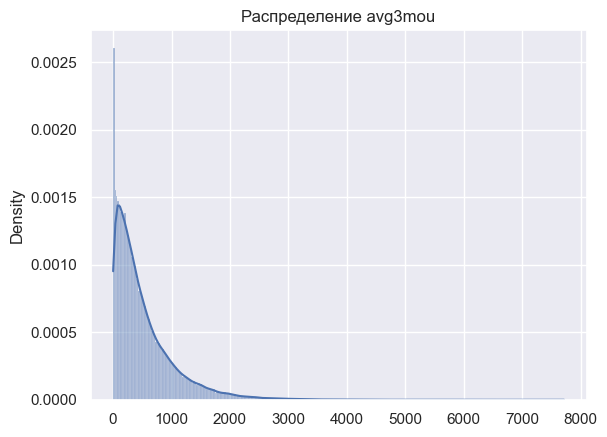

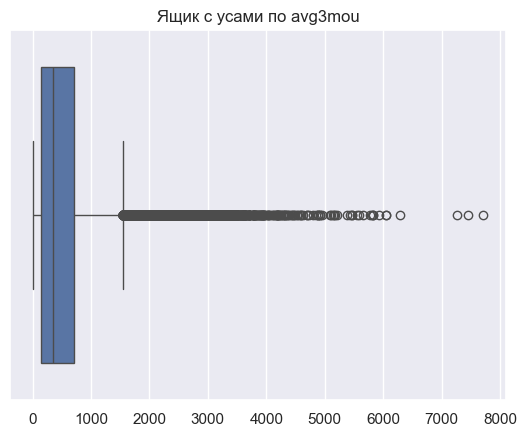

Описание avg3qty - 
count    98908.000000
mean       179.856088
std        191.871336
min          0.000000
25%         55.000000
50%        125.000000
75%        239.000000
max       3909.000000
Name: avg3qty, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1540
Доля выбросов: 1.56%
Диапазон "нормальных" значений: -497.00 - 791.00
**************************************************


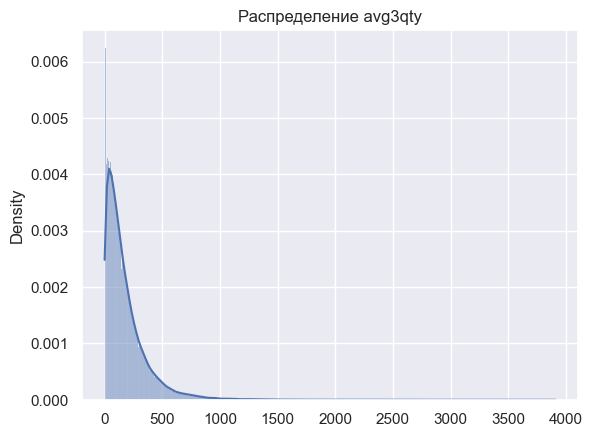

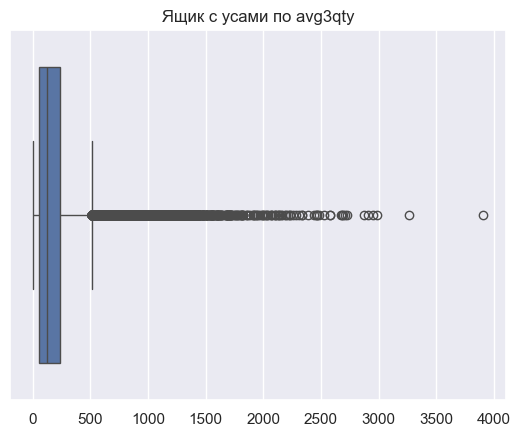

Описание avg3rev - 
count    98908.000000
mean        59.099769
std         46.578480
min          1.000000
25%         33.000000
50%         48.000000
75%         71.000000
max       1593.000000
Name: avg3rev, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2183
Доля выбросов: 2.21%
Диапазон "нормальных" значений: -81.00 - 185.00
**************************************************


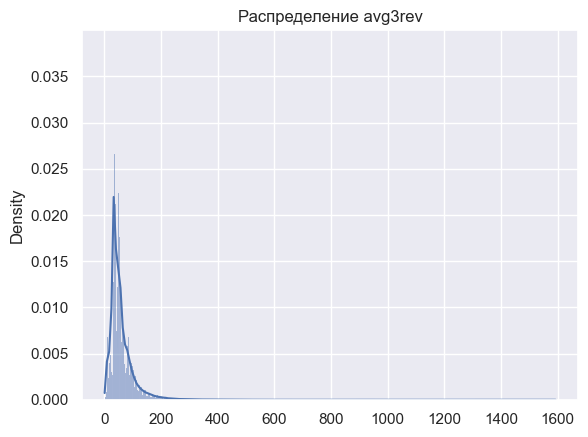

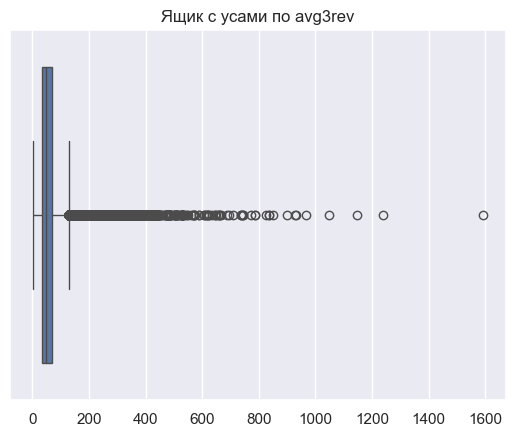

Описание lor_-9999 -  с "-9999" в пропусках
count    98908.000000
mean     -2947.791089
std       4563.910925
min      -9999.000000
25%      -9999.000000
50%          2.000000
75%          7.000000
max         15.000000
Name: lor_-9999, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Выбросов по threshold = 3 нет
Диапазон "нормальных" значений: -40017.00 - 30025.00
**************************************************


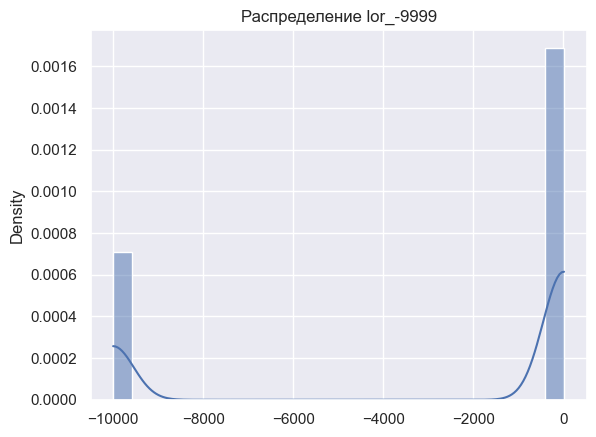

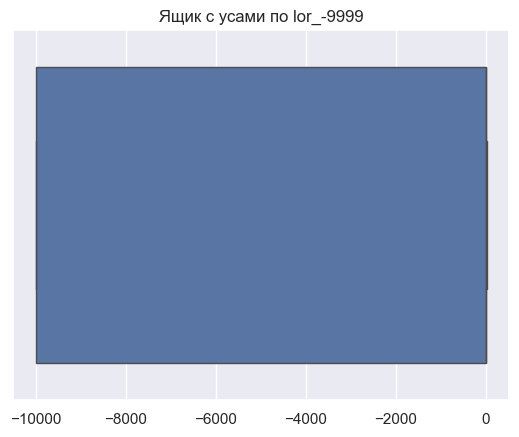

Описание adults_-9999 - Количество взрослых с "-9999" в пропусках
count    98908.000000
mean     -2226.447021
std       4162.334143
min      -9999.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: adults_-9999, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 22043
Доля выбросов: 22.29%
Диапазон "нормальных" значений: -5.00 - 9.00
**************************************************


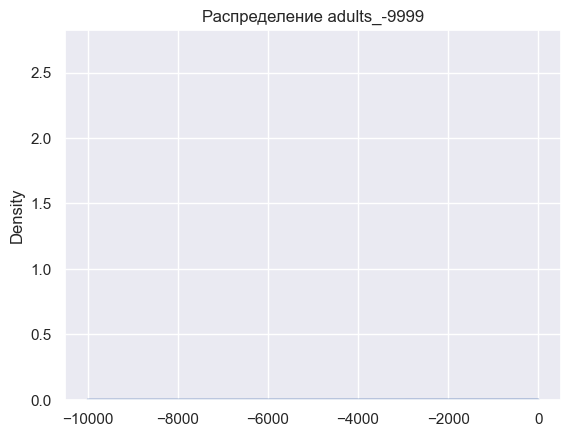

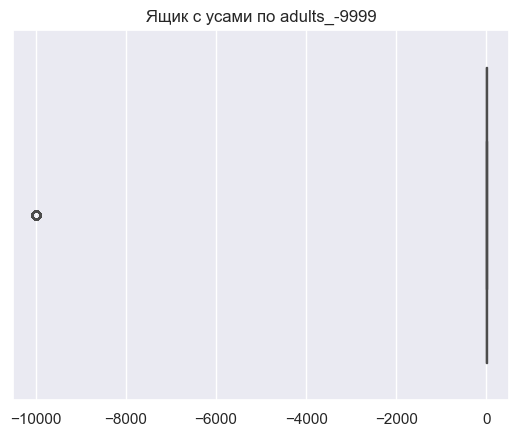

Описание income_-9999 - Признак, касающийся дохода клиента с "-9999" в пропусках
count    98908.000000
mean     -2467.696021
std       4316.100555
min      -9999.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: income_-9999, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 24453
Доля выбросов: 24.72%
Диапазон "нормальных" значений: -17.00 - 25.00
**************************************************


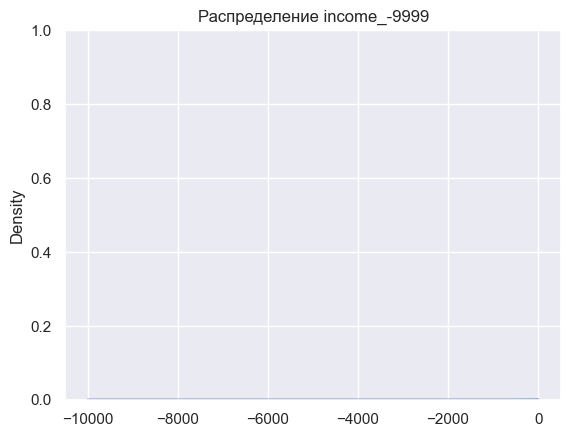

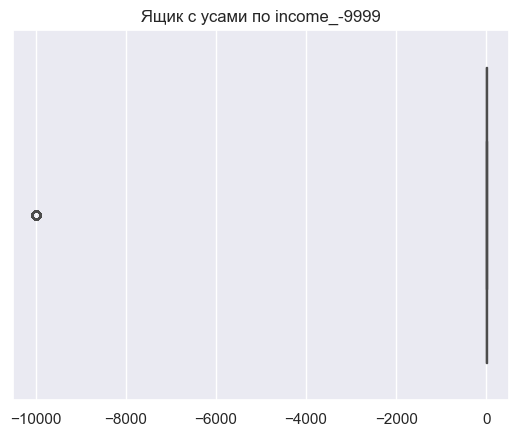

Описание numbcars_-9999 - Признак, касающийся количества автомобилей с "-9999" в пропусках
count    98908.000000
mean     -4885.372033
std       4999.024396
min      -9999.000000
25%      -9999.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: numbcars_-9999, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Выбросов по threshold = 3 нет
Диапазон "нормальных" значений: -40002.00 - 30005.00
**************************************************


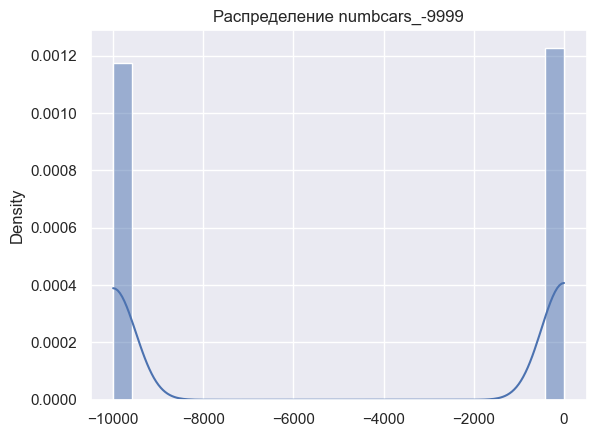

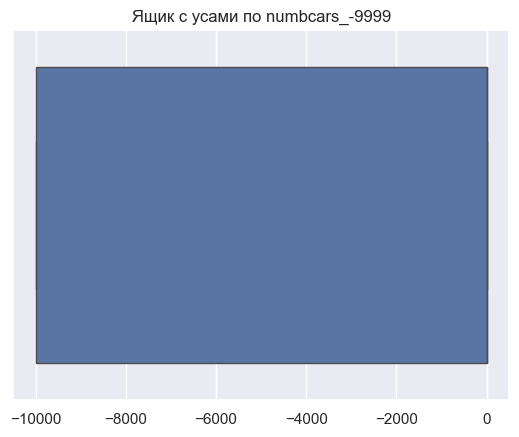

Описание truck_impute_mode -  с модой в пропусках
count    98908.000000
mean         0.187417
std          0.390248
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: truck_impute_mode, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 18537
Доля выбросов: 18.74%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


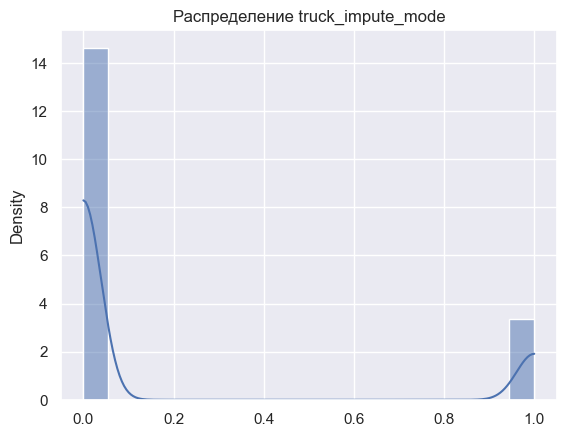

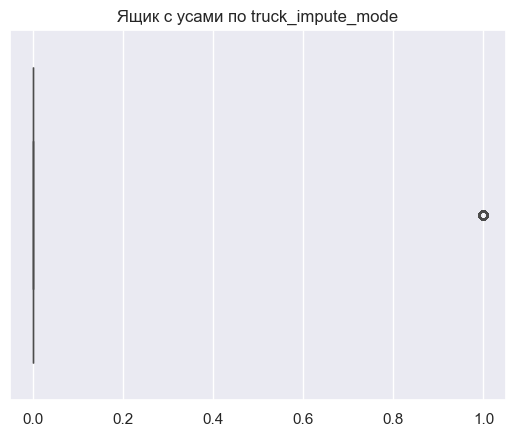

Описание rv_impute_mode -  с модой в пропусках
count    98908.000000
mean         0.081955
std          0.274297
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rv_impute_mode, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 8106
Доля выбросов: 8.20%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


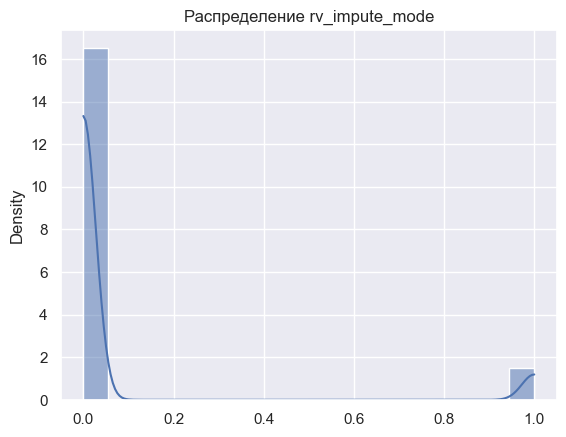

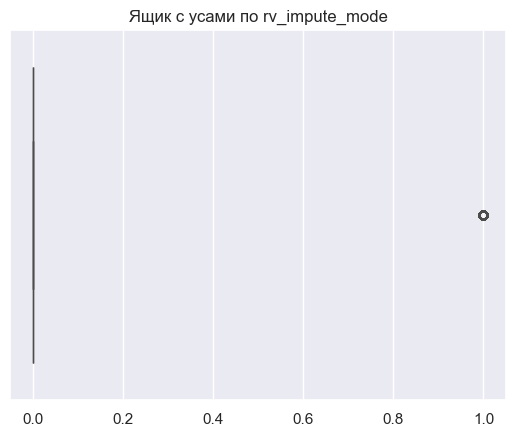

Описание forgntvl_impute_mode -  с модой в пропусках
count    98908.000000
mean         0.057528
std          0.232850
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: forgntvl_impute_mode, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 5690
Доля выбросов: 5.75%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


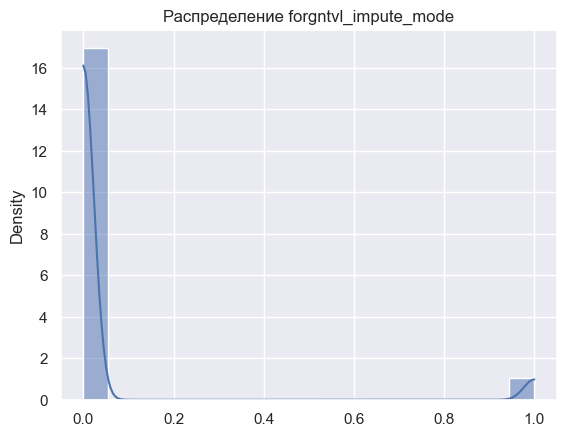

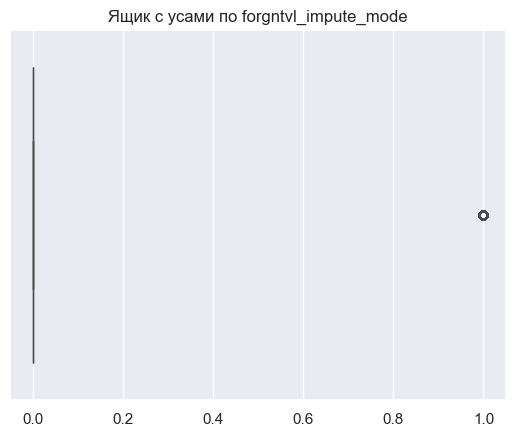

Описание rev_Mean_impute_median - Среднее значение по доходам с медианой в пропусках
count    98908.000000
mean        58.589302
std         46.129375
min          0.000000
25%         33.260000
50%         48.122500
75%         70.553750
max       3843.262500
Name: rev_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 2025
Доля выбросов: 2.05%
Диапазон "нормальных" значений: -78.62 - 182.44
**************************************************


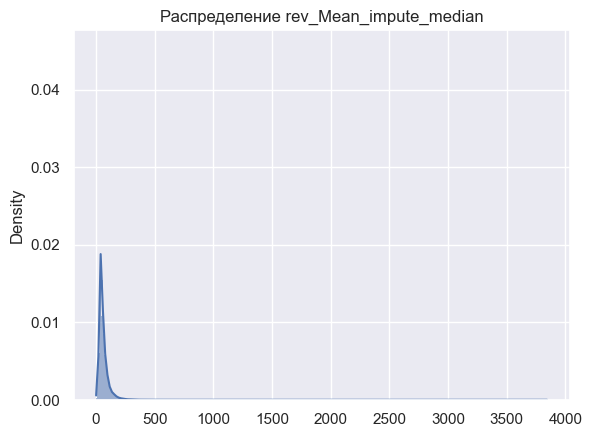

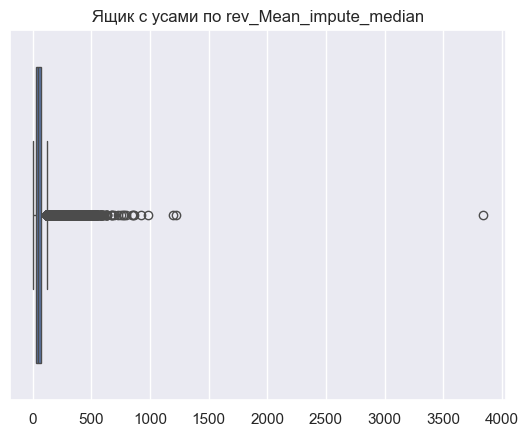

Описание mou_Mean_impute_median - Среднее значение по продолжительности разговоров с медианой в пропусках
count    98908.000000
mean       511.599570
std        522.313404
min          0.000000
25%        151.250000
50%        354.750000
75%        699.250000
max      12206.750000
Name: mou_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 1118
Доля выбросов: 1.13%
Диапазон "нормальных" значений: -1492.75 - 2343.25
**************************************************


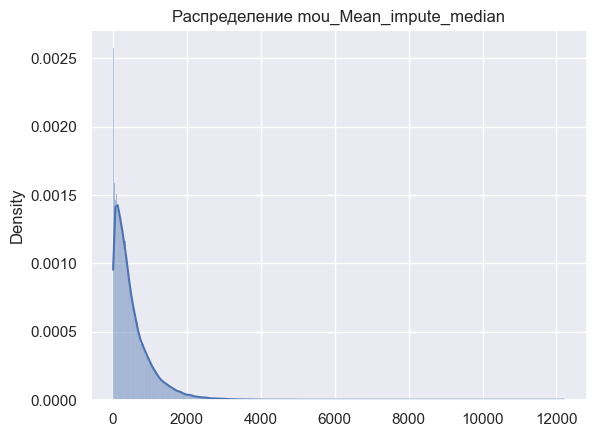

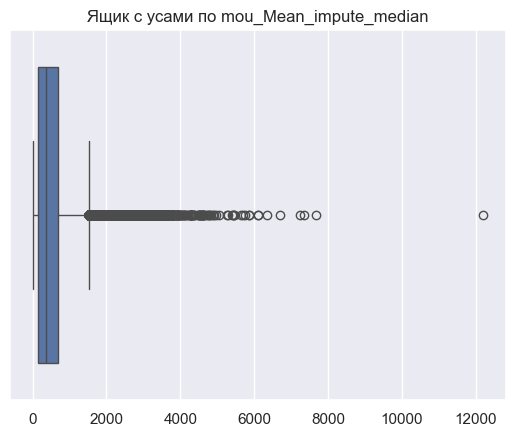

Описание totmrc_Mean_impute_median - Общие расходы с медианой в пропусках
count    98908.000000
mean        46.128949
std         23.557799
min          0.000000
25%         30.000000
50%         44.990000
75%         59.990000
max        409.990000
Name: totmrc_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 537
Доля выбросов: 0.54%
Диапазон "нормальных" значений: -59.97 - 149.96
**************************************************


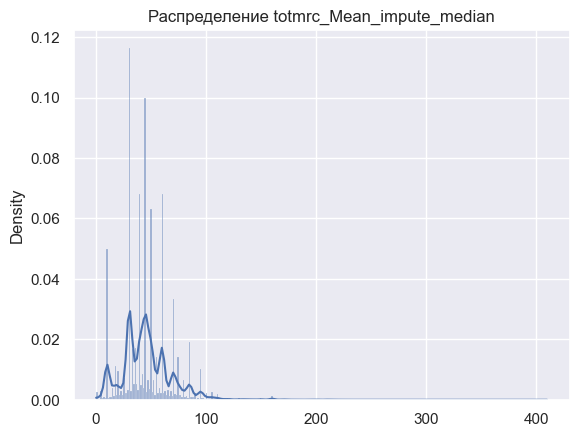

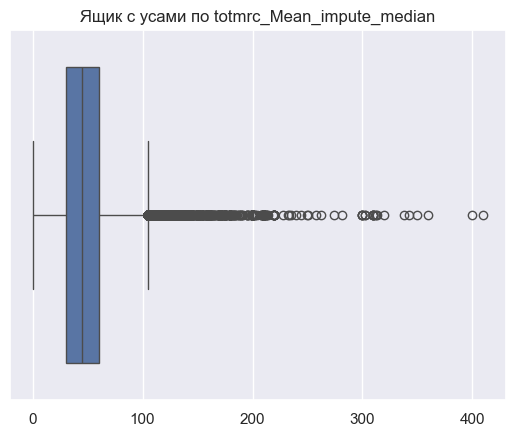

Описание da_Mean_impute_median - Использование данных с медианой в пропусках
count    98908.000000
mean         0.884631
std          2.171345
min          0.000000
25%          0.000000
50%          0.247500
75%          0.742500
max        159.390000
Name: da_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 7490
Доля выбросов: 7.57%
Диапазон "нормальных" значений: -2.23 - 2.97
**************************************************


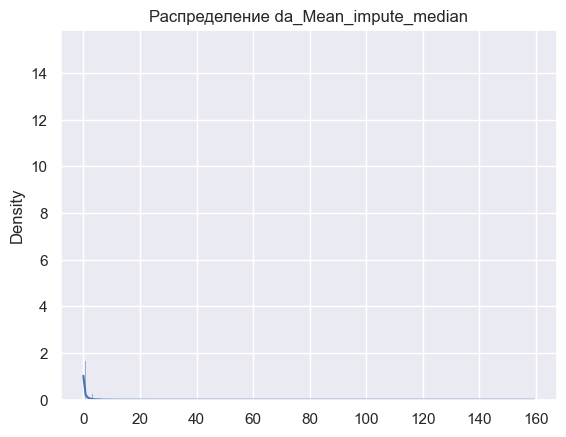

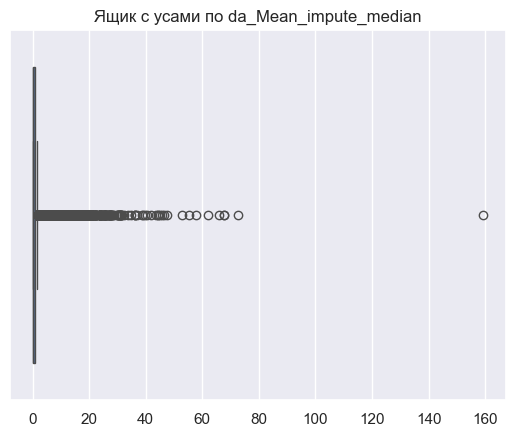

Описание ovrmou_Mean_impute_median - Среднее превышение по минутам с медианой в пропусках
count    98908.000000
mean        40.820908
std         96.865626
min          0.000000
25%          0.000000
50%          2.750000
75%         41.750000
max       4320.750000
Name: ovrmou_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 6288
Доля выбросов: 6.36%
Диапазон "нормальных" значений: -125.25 - 167.00
**************************************************


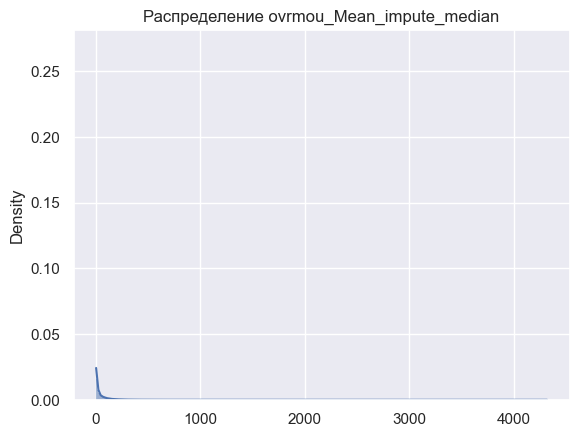

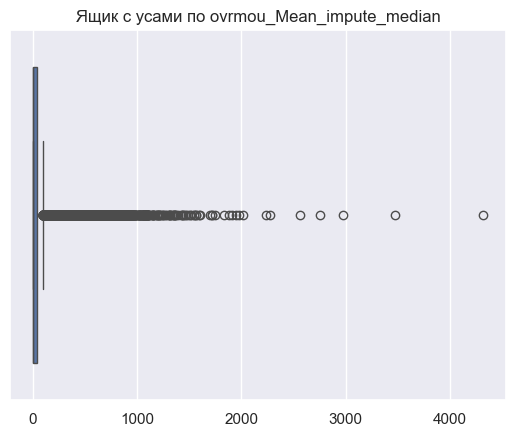

Описание ovrrev_Mean_impute_median - Среднее превышение по доходам с медианой в пропусках
count    98908.000000
mean        13.477973
std         30.385835
min          0.000000
25%          0.000000
50%          1.000000
75%         14.325000
max       1102.400000
Name: ovrrev_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 6024
Доля выбросов: 6.09%
Диапазон "нормальных" значений: -42.97 - 57.30
**************************************************


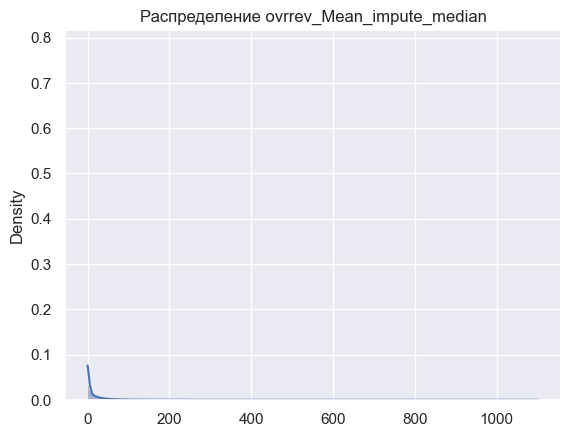

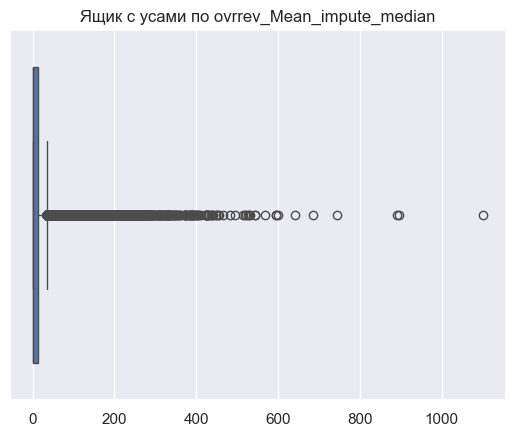

Описание vceovr_Mean_impute_median - Среднее значение по голосовым перегрузкам с медианой в пропусках
count    98908.000000
mean        13.213570
std         29.937271
min          0.000000
25%          0.000000
50%          0.675000
75%         13.926250
max        896.087500
Name: vceovr_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 6207
Доля выбросов: 6.28%
Диапазон "нормальных" значений: -41.78 - 55.70
**************************************************


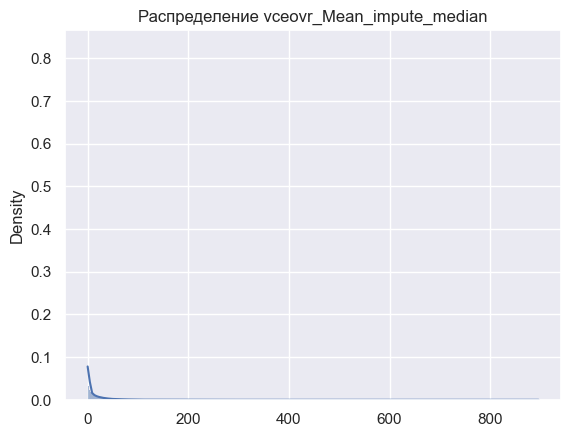

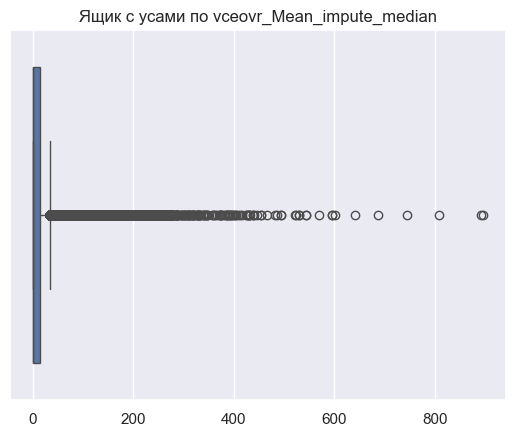

Описание datovr_Mean_impute_median - Среднее значение по переплатам за использование данных с медианой в пропусках
count    98908.000000
mean         0.260634
std          3.133806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        423.540000
Name: datovr_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 13508
Доля выбросов: 13.66%
Диапазон "нормальных" значений: 0.00 - 0.00
**************************************************


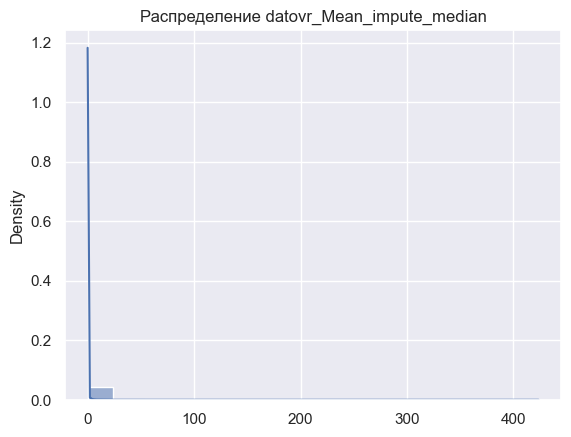

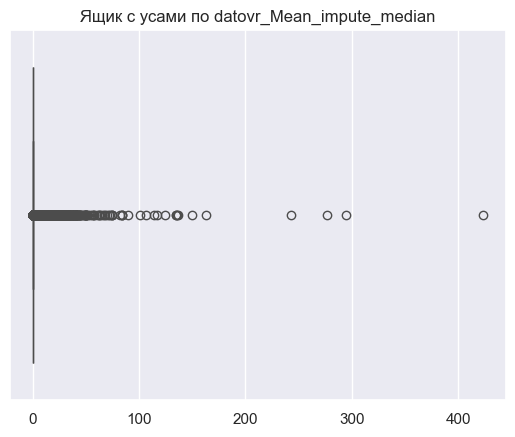

Описание roam_Mean_impute_median - Среднее значение по переплатам по роуминговым звонкам с медианой в пропусках
count    98908.000000
mean         1.275568
std         14.743635
min          0.000000
25%          0.000000
50%          0.000000
75%          0.235000
max       3685.200000
Name: roam_Mean_impute_median, dtype: float64
Количество пропущенных значений - 0, что составляет 0.00%
Количество выбросов в данных: 15417
Доля выбросов: 15.59%
Диапазон "нормальных" значений: -0.70 - 0.94
**************************************************


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000147A5A4B060> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000147A5D77C40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [119]:
for numeric in numbers:
    check_stat_for_numeric(df2, numeric)
    plt.title('Распределение ' + numeric)
    sns.histplot(data=df2, x=numeric, kde=True, element='bars', stat='density').set(xlabel='')
    plt.show()
    plt.title('Ящик с усами по ' + numeric)
    sns.boxplot(data=df2, x=numeric).set(xlabel='')
    plt.show()

##### 2.2 Разделение данные на тренировочную и тестовую выборки. 

In [134]:
from sklearn import model_selection as ms

In [136]:
X_train, X_test, y_train, y_test = ms.train_test_split(df2.drop(columns='churn'), df2.churn, test_size=0.2, random_state=42, stratify=df2.churn)

Закодируем оставшиеся категориальные переменные с помощью WOEEncoder

In [139]:
import category_encoders as ce

In [141]:
woe_enc = ce.WOEEncoder(cols=other_categories).fit(X_train,y_train)

In [142]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

##### 2.3. Feature Selection

Посмотрим на малоинформативные переменные:

In [147]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
selector.fit(X_train)
constant_features = X_train.columns[~selector.get_support()]
print("Константные признаки: ", constant_features)

Константные признаки:  Index(['crclscod', 'rv_impute_mode', 'forgntvl_impute_mode',
       'truck_impute_mode_mode_outliers', 'rv_impute_mode_mode_outliers',
       'forgntvl_impute_mode_mode_outliers', 'drop_dat_Mean_median_outliers',
       'blck_dat_Mean_median_outliers', 'unan_dat_Mean_median_outliers',
       'plcd_dat_Mean_median_outliers', 'recv_sms_Mean_median_outliers',
       'comp_dat_Mean_median_outliers', 'threeway_Mean_median_outliers',
       'mou_cdat_Mean_median_outliers', 'peak_dat_Mean_median_outliers',
       'mou_pead_Mean_median_outliers', 'opk_dat_Mean_median_outliers',
       'mou_opkd_Mean_median_outliers', 'callfwdv_Mean_median_outliers',
       'datovr_Mean_impute_median_median_outliers',
       'roam_Mean_impute_median_median_outliers', 'area_impute_mode',
       'marital_impute_mode', 'prizm_social_one_Missing', 'HHstatin_Missing',
       'dwllsize_Missing', 'ethnic_Missing', 'dualband_impute_mode_T',
       'dualband_impute_mode_U', 'kid0_2_impute_mode_Y',

In [149]:
X_train.drop(columns=constant_features, inplace=True)
X_test.drop(columns=constant_features, inplace=True)

Корреляция:

In [152]:
def corr_feature_detect(data,threshold=0.8):
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            correlated_groups.append(correlated_block)
    return correlated_groups

In [154]:
corr = corr_feature_detect(data=X_train,threshold=0.9)
for i in corr:
    print(i,'\n')

    feature1 feature2      corr
0   totcalls   adjqty  0.999801
78  totcalls   totmou  0.926517
83  totcalls   adjmou  0.926269 

         feature1       feature2      corr
4   plcd_vce_Mean   attempt_Mean  0.998512
26  plcd_vce_Mean  comp_vce_Mean  0.985668
31  plcd_vce_Mean  complete_Mean  0.983786 

  feature1 feature2      corr
6   totrev   adjrev  0.998503 

                     feature1                   feature2     corr
10  vceovr_Mean_impute_median  ovrrev_Mean_impute_median  0.99613
49  vceovr_Mean_impute_median  ovrmou_Mean_impute_median  0.95434 

                  feature1                feature2      corr
12  adjmou_median_outliers  totmou_median_outliers  0.995222 

                         feature1                       feature2      corr
14  plcd_vce_Mean_median_outliers   attempt_Mean_median_outliers  0.993919
53  plcd_vce_Mean_median_outliers  comp_vce_Mean_median_outliers  0.952534
59  plcd_vce_Mean_median_outliers  complete_Mean_median_outliers  0.950315 

        

Выбор лучших признаков:

In [157]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif,chi2

In [159]:
def mutual_info(X,y,select_k=10):

    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X,y)
        col = X.columns[sel_.get_support()]
        
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X,y)
        col = X.columns[sel_.get_support()]   
        
    else:
        raise ValueError("select_k должно быть положительным значением")
    
    return col

In [161]:
mi = mutual_info(X=X_train,y=y_train,select_k=20)
print(mi)

Index(['months', 'actvsubs', 'totrev', 'numbcars_-9999',
       'totmrc_Mean_impute_median', 'hnd_price_impute_median',
       'eqpdays_impute_median', 'uniqsubs_median_outliers',
       'totrev_median_outliers', 'adjqty_median_outliers',
       'rev_Mean_impute_median_median_outliers',
       'totmrc_Mean_impute_median_median_outliers',
       'models_impute_median_median_outliers',
       'eqpdays_impute_median_median_outliers', 'new_cell_U',
       'dualband_impute_mode_Y', 'creditcd_impute_mode_Y',
       'hnd_webcap_Missing_WCMB', 'ownrent_Missing_O', 'dwlltype_Missing_S'],
      dtype='object')


In [162]:
import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [163]:
def univariate_mse(X_train,y_train,X_test,y_test,threshold):

    mse_values = []
    for feature in X_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(X_train[feature].to_frame(), y_train)
        y_scored = clf.predict(X_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = X_train.columns
    print(mse_values.sort_values(ascending=False))
    print("Количество отобранных признаков и число всех: ", len(mse_values[mse_values > threshold]), len(X_train.columns))
    keep_col = mse_values[mse_values > threshold]
    return keep_col

In [164]:
uni_mse = univariate_mse(X_train=X_train,y_train=y_train,
                            X_test=X_test,y_test=y_test,threshold=0.30)

print("Отобранные признаки по порогу:\n", list(uni_mse.index))

totrev                                   0.466551
adjrev                                   0.464674
totrev_median_outliers                   0.461992
adjrev_median_outliers                   0.459667
mou_cvce_Mean                            0.451869
                                           ...   
hnd_webcap_Missing_WCMB                  0.248046
hnd_price_impute_median                  0.247128
eqpdays_impute_median                    0.246489
eqpdays_impute_median_median_outliers    0.246285
months                                   0.242606
Length: 143, dtype: float64
Количество отобранных признаков и число всех:  29 143
Отобранные признаки по порогу:
 ['mou_cvce_Mean', 'mou_rvce_Mean', 'mouowylisv_Mean', 'mouiwylisv_Mean', 'mou_peav_Mean', 'mou_opkv_Mean', 'totmou', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgmou', 'avgqty', 'rev_Mean_impute_median', 'change_rev_impute_median', 'mou_cvce_Mean_median_outliers', 'mou_rvce_Mean_median_outliers', 'mouowylisv_Mean_median_outliers', 'mou

Объединим отобранные признаки и посмотрим на их корреляцию, чтобы убрать лишнее:

In [167]:
cols = [col for col in list(uni_mse.index)]
for col in mi:
    cols.append(col)

cols = list(set(cols))

In [168]:
corr = corr_feature_detect(data=X_train[cols],threshold=0.9)
for i in corr:
    print(i,'\n')

  feature1 feature2      corr
0   totmou   adjmou  0.999748 

  feature1 feature2      corr
2   adjrev   totrev  0.998503 

                 feature1                feature2      corr
4  totmou_median_outliers  adjmou_median_outliers  0.995222 

                 feature1                feature2      corr
6  adjrev_median_outliers  totrev_median_outliers  0.989891 

                                feature1               feature2      corr
8  eqpdays_impute_median_median_outliers  eqpdays_impute_median  0.981567 

                     feature1                                   feature2  \
10  totmrc_Mean_impute_median  totmrc_Mean_impute_median_median_outliers   

        corr  
10  0.900412   



In [169]:
cols.remove('adjmou')
cols.remove('adjrev')
cols.remove('adjmou_median_outliers')
cols.remove('adjrev_median_outliers')
cols.remove('eqpdays_impute_median')
cols.remove('totmrc_Mean_impute_median')

In [170]:
X_train_new, X_test_new = X_train[cols], X_test[cols]

### 3. Модель

##### DecisionTree

In [176]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pydot
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [177]:
def quality_report(prediction, actual):
    print(f"Accuracy: {accuracy_score(actual, prediction)},\nPrecision: {precision_score(actual, prediction)},\nRecall: {recall_score(actual, prediction)},\nF1: {f1_score(actual, prediction)}")

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    print(f"ROC-AUC: {roc_auc_score(actual, prob_prediction)}")
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {roc_auc_score(actual, prob_prediction)}")
    plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
first_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [180]:
print("Train quality")
quality_report(first_tree.predict(X_train), y_train)

print("\nTest quality")
quality_report(first_tree.predict(X_test), y_test)

Train quality
Accuracy: 0.5901852741197584,
Precision: 0.5655264070264648,
Recall: 0.7484132446279728,
F1: 0.6442418457690156

Test quality
Accuracy: 0.5882620564149227,
Precision: 0.5633041492196422,
Recall: 0.754384176182708,
F1: 0.6449897572244258


In [181]:
from sklearn.metrics import roc_auc_score

roc_auc_score(first_tree.predict(X_test), y_test)

0.6004425063835536

ROC-AUC: 0.615430558890309


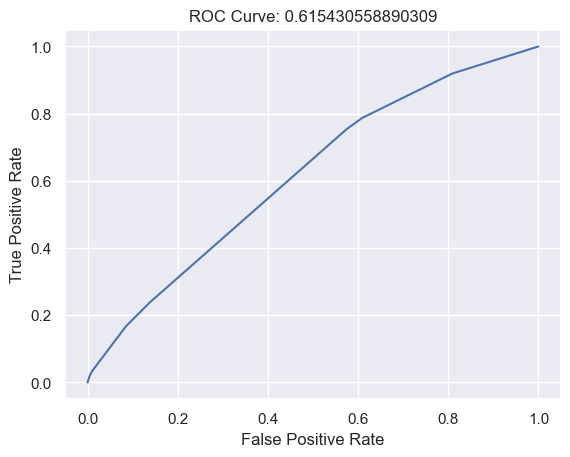

In [182]:
plot_roc_curve(first_tree.predict_proba(X_test)[:, 1], y_test)

In [183]:
from sklearn.model_selection import RandomizedSearchCV
model = DecisionTreeClassifier()

# Определение распределений для гиперпараметров
param_dist = {
    'max_depth': list(range(2, 50)),
    'min_samples_split': list(range(2, 50)),
    'min_samples_leaf': list(range(1, 50))
}

# Применение Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print("Лучшие гиперпараметры: ", random_search.best_params_)

Лучшие гиперпараметры:  {'min_samples_split': 4, 'min_samples_leaf': 44, 'max_depth': 6}


In [184]:
random_search.best_params_, round(random_search.best_score_, 3)

({'min_samples_split': 4, 'min_samples_leaf': 44, 'max_depth': 6}, 0.595)

In [185]:
quality_report(random_search.predict(X_test), y_test)

Accuracy: 0.6033768071984632,
Precision: 0.5890684583257672,
Recall: 0.6615008156606852,
F1: 0.6231870137354721


ROC-AUC: 0.6431936125279724


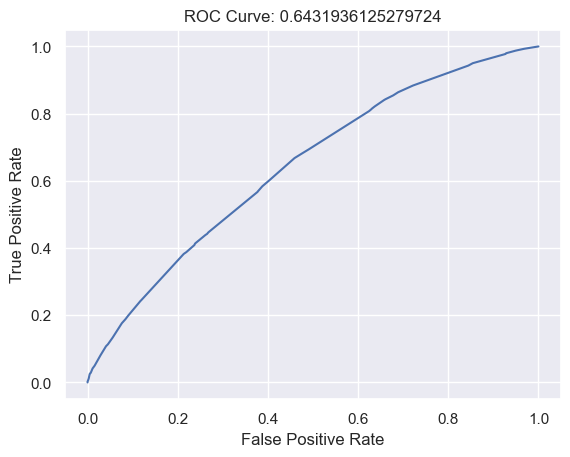

In [186]:
plot_roc_curve(random_search.predict_proba(X_test)[:, 1], y_test)

Вывод:
Модель, к сожалению, обладает не самой высокой предсказательной способностью. Теперь очевидно, что нужно было после первичной обработки построить дефолтную модель и в дальнейшем выполнять шаги по обработке наших данных на основе отклонения новых показателей от дефолтных показателей модели.